In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install scikit-learn==1.2.0 imbalanced-learn==0.10.0
!pip install statsmodels

!pip show scikit-learn imbalanced-learn

from scipy.stats import ttest_ind,chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve, auc, precision_recall_curve, average_precision_score,
                            ConfusionMatrixDisplay,RocCurveDisplay,f1_score,recall_score,precision_score)

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings("ignore")

Name: scikit-learn
Version: 1.2.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\junai\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex
---
Name: imbalanced-learn
Version: 0.10.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\junai\anaconda3\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 


In [2]:
lt_data=pd.read_csv('logistic_regression.csv')

In [3]:
df=lt_data.copy()
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
pd.set_option('display.max_columns',None)

## Data Exploration

In [6]:
df.shape

(396030, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

## Statistical Summary

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [11]:
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


## Duplicate Detection

In [13]:
df[df.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


The dataset does not contain any duplicated values

## Null Detection

In [16]:
df.isna().any()[df.isna().any()]

emp_title               True
emp_length              True
title                   True
revol_util              True
mort_acc                True
pub_rec_bankruptcies    True
dtype: bool

In [17]:
df.isna().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

In [18]:
def missing_data(df):
    total_missing=df.isnull().sum().sort_values(ascending=False)
    percent_missing_df=(df.isnull().sum()/df.isna().count()*100).sort_values(ascending=False)
    missing_data_df=pd.concat([total_missing,percent_missing_df],axis=1,keys=['Total','Percent'])
    return missing_data_df

missing_pct=missing_data(df)
missing_pct[missing_pct['Total'] >0]

,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


Insights

1. mort_acc has 9.54% missing values
2. emp_length has 4.62% missing values
3. emp_title has 5.78% missing values
4. title has 0.44% missing values
5. pub_rec-bankruptcies has 0.13% missing values
6. revol_util has 0.069% missing values

We need to impute the missing values since ML algos do not work on columns having them

In [21]:
df.isna().sum().sum()

81589

Since there are 81590 NA rows we cannot drop the NA values

In [23]:
for col in df.columns:
    print()
    print(f'Total Unique Values in {col} column are :- {df[col].nunique()}')
    print(f'Unique Values in {col} column are :-\n {df[col].unique()}')
    print(f'Value_counts of {col} column :-\n {df[col].value_counts()}')
    print()
    print('-'*120)


Total Unique Values in loan_amnt column are :- 1397
Unique Values in loan_amnt column are :-
 [10000.  8000. 15600. ... 36275. 36475.   725.]
Value_counts of loan_amnt column :-
 10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
36225.0        1
950.0          1
37800.0        1
30050.0        1
725.0          1
Name: loan_amnt, Length: 1397, dtype: int64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in term column are :- 2
Unique Values in term column are :-
 [' 36 months' ' 60 months']
Value_counts of term column :-
  36 months    302005
 60 months     94025
Name: term, dtype: int64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in int_rate column are :- 566
Unique Values in int_rate column are :-
 [11.44 11.99 10.49  6.49 17.27 13.33  5.32 1

## Null Value Treatment

In [25]:
df.loc[df['revol_util'].isna(),'revol_util']=0.0
df.loc[df['pub_rec_bankruptcies'].isna(),'pub_rec_bankruptcies']=0.0
df.loc[df['mort_acc'].isna(),'mort_acc']=0.0
df.loc[df['emp_title'].isna(),'emp_title'] = 'No Employee Title'
df.loc[df['title'].isna(),'title'] = 'Unavailable'
df['emp_length'] = df['emp_length'].fillna('< 1 year')

In [26]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,396030.0,53.754260,24.484857,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [28]:
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,396030,173106,No Employee Title,22927
emp_length,396030,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


## Feature Engineering

In [30]:
df['pub_rec']= [1 if i>1 else 0 for i in df['pub_rec']]
df['mort_acc']= [1 if i>1 else 0 for i in df['mort_acc']]
df['pub_rec_bankruptcies'] = [1 if i > 1 else 0 for i in df['pub_rec_bankruptcies']]

In [31]:
df.sample()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
321932,30000.0,60 months,15.88,727.64,C,C4,USALCO L.L.C.,10+ years,MORTGAGE,80000.0,Verified,Jul-2013,Fully Paid,credit_card,credit card refi.,5.07,Jul-1997,5.0,0,20683.0,61.4,12.0,f,INDIVIDUAL,1,0,"5847 Moore Glens Apt. 417\r\nDeckerfurt, OH 05113"


In [32]:
#Splitting issue date by month and year
df[['issue_month','issue_year']]= df['issue_d'].str.split('-',expand=True)
df.drop(['issue_d'],axis=1,inplace=True)

In [33]:
#Splitting earliest_cr_line by month and year
df[['earliest_cr_line_m','earliest_cr_line_y']]=df['earliest_cr_line'].str.split('-',expand=True)
df.drop(['earliest_cr_line'],axis=1,inplace=True)

In [34]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [35]:
#Split address into State and zipcode
import re
df[['state','zipcode']]=df['address'].str.extract(r'([A-Z]{2}) (\d{5})')
df.drop(['address'],axis=1,inplace=True)

In [36]:
df['state'].nunique() , df['zipcode'].nunique()

(54, 10)

In [37]:
df['state'].isna().sum() , df['zipcode'].isna().sum()

(0, 0)

In [38]:
df['emp_length_yrs'] = df['emp_length'].str.extract('(\d+)')
df.drop(['emp_length'],axis=1,inplace=True)

In [39]:
df.sample()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_line_m,earliest_cr_line_y,state,zipcode,emp_length_yrs
246121,11000.0,36 months,13.49,373.24,C,C1,TX Army National Guard,MORTGAGE,48000.0,Verified,Fully Paid,debt_consolidation,Debt Consolidation,21.82,15.0,0,11382.0,65.0,29.0,f,INDIVIDUAL,0,0,Dec,2011,Dec,1999,OR,48052,10


In [40]:
df.shape

(396030, 30)

In [41]:
## Categorical Columns
cat_cols= df.select_dtypes(include='object')

##Numerical columns
num_cols= df.select_dtypes(exclude='object')

In [42]:
cat_cols.sample()

,term,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,issue_month,issue_year,earliest_cr_line_m,earliest_cr_line_y,state,zipcode,emp_length_yrs
284609,60 months,D,D4,clerk,MORTGAGE,Source Verified,Charged Off,debt_consolidation,Debt consolidation,w,INDIVIDUAL,Oct,2014,May,1995,NV,11650,10


In [43]:
num_cols.sample()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
68710,1700.0,11.49,56.06,27000.0,8.76,7.0,0,2041.0,23.2,8.0,0,0


In [44]:
num_cols.skew()

## Features are right skewed

loan_amnt                 0.777285
int_rate                  0.420669
installment               0.983598
annual_inc               41.042725
dti                     431.051225
open_acc                  1.213019
pub_rec                   6.812303
revol_bal                11.727515
revol_util               -0.074238
total_acc                 0.864328
mort_acc                  0.412225
pub_rec_bankruptcies     12.936099
dtype: float64

Log Transformation needs to be applied in order to treat them

In [46]:
df1=df.copy()

In [47]:
df1.sample()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_line_m,earliest_cr_line_y,state,zipcode,emp_length_yrs
58963,6075.0,36 months,9.16,193.64,B,B2,CFO,MORTGAGE,100000.0,Not Verified,Fully Paid,credit_card,Credit card refinancing,9.92,15.0,0,16644.0,35.3,35.0,w,INDIVIDUAL,0,0,Feb,2016,Mar,2001,WY,05113,4


## What percentage of Customers have fully paid their Loans ?

In [49]:
df['loan_status'].value_counts(normalize=True)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

Target variable distribution is notably imbalanced. 80%-20%

Graphical Analysis (uni/bi/multi variate analysis)

In [52]:
cp = ['indigo','m','darkviolet','magenta','mediumorchid','violet','purple','orchid','mediumpurple','deeppink','blueviolet','darkmagenta','fuchsia']

In [53]:
num_cols.iloc[:,[0,2,3,4,5,6,8,9,10]].sample()

,loan_amnt,installment,annual_inc,dti,open_acc,pub_rec,revol_util,total_acc,mort_acc
259962,5000.0,160.57,30000.0,9.24,4.0,0,15.4,8.0,0


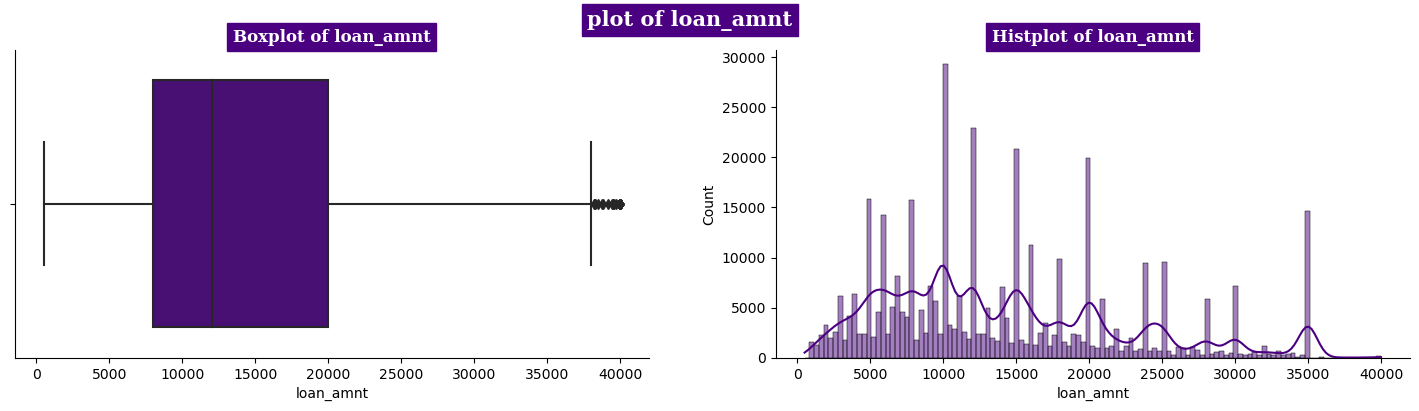

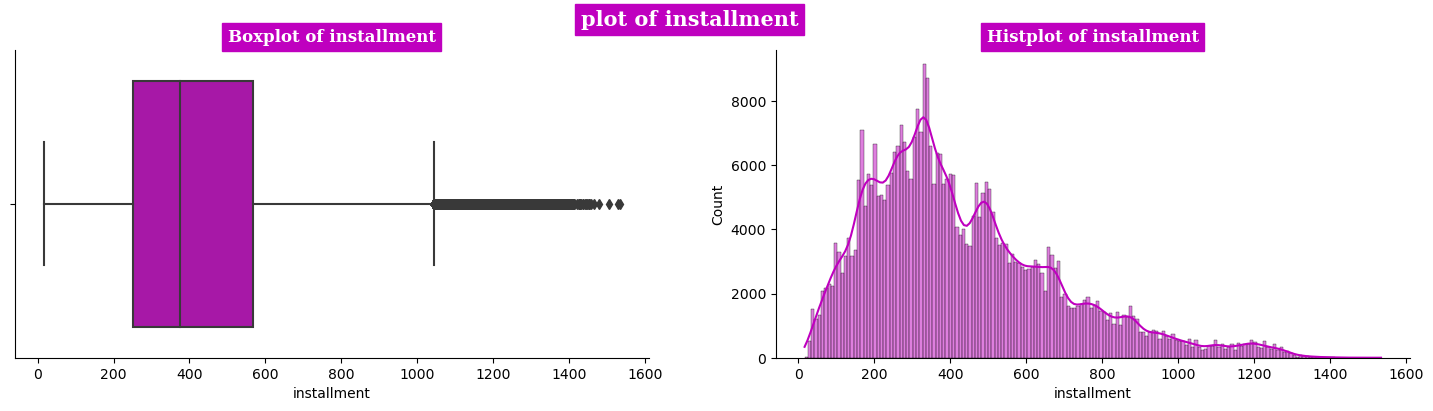

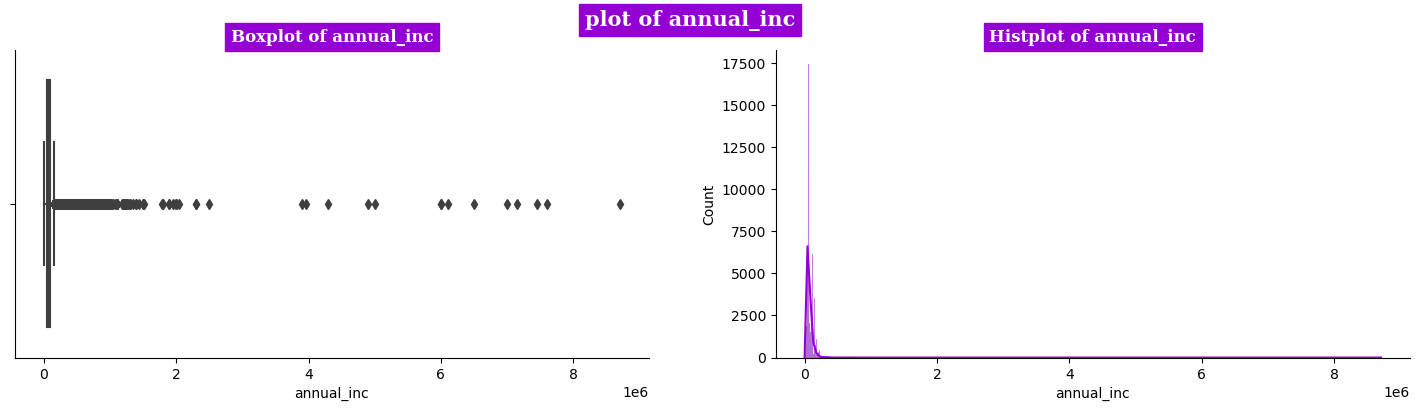

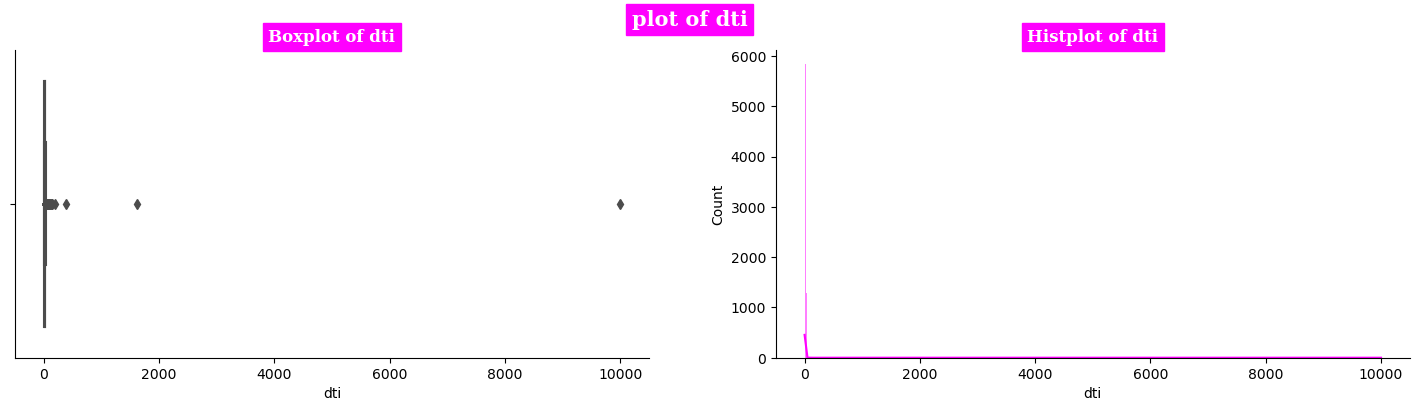

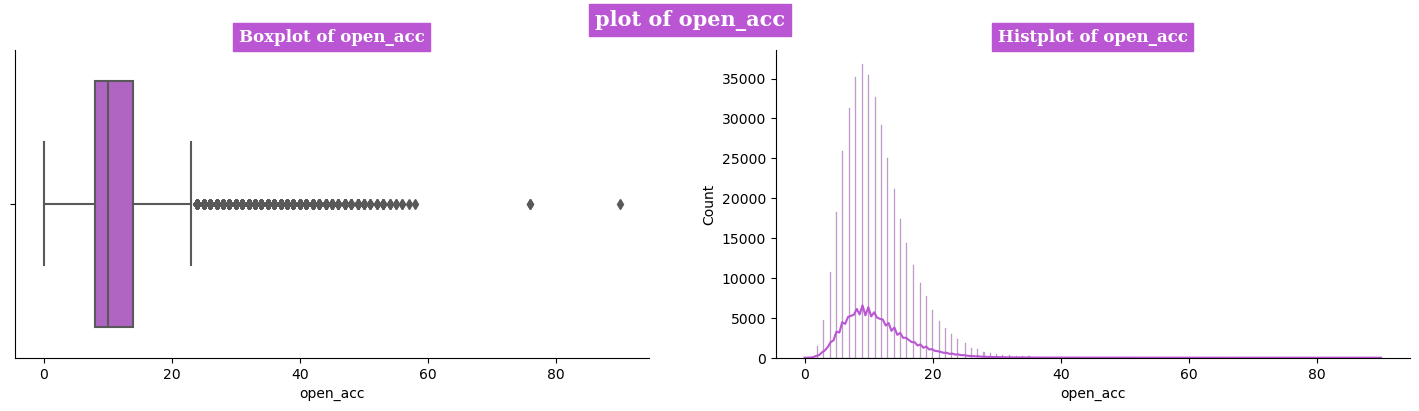

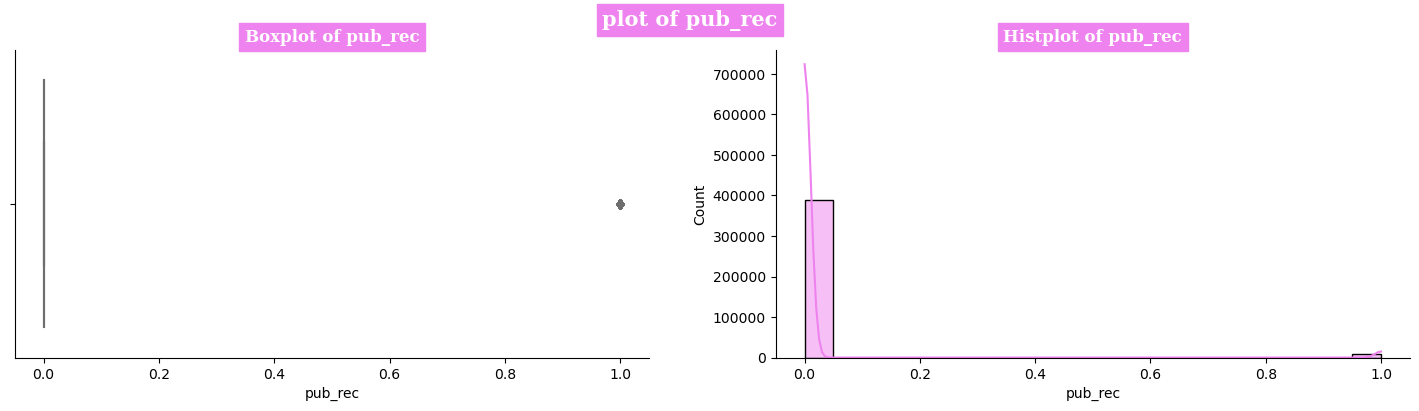

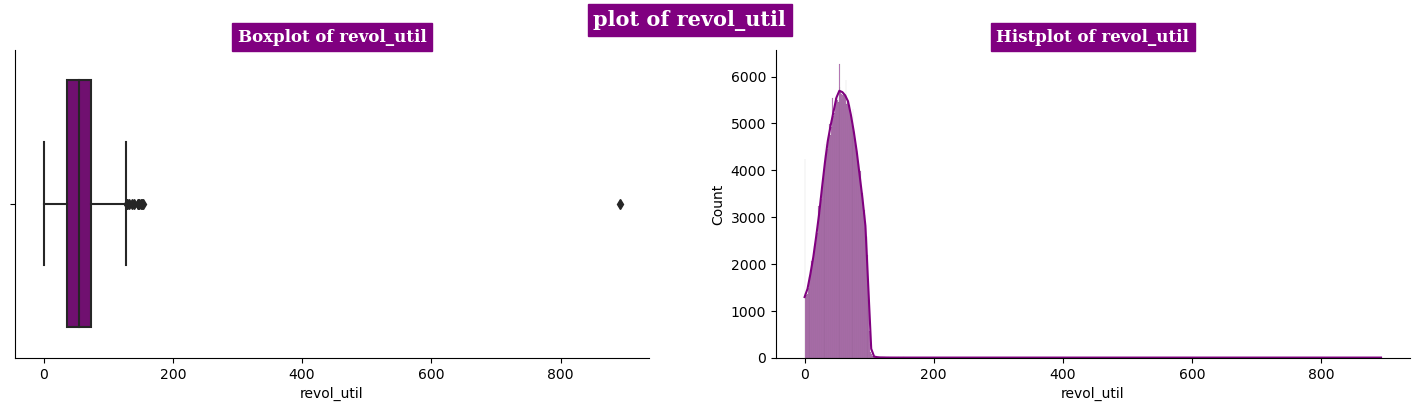

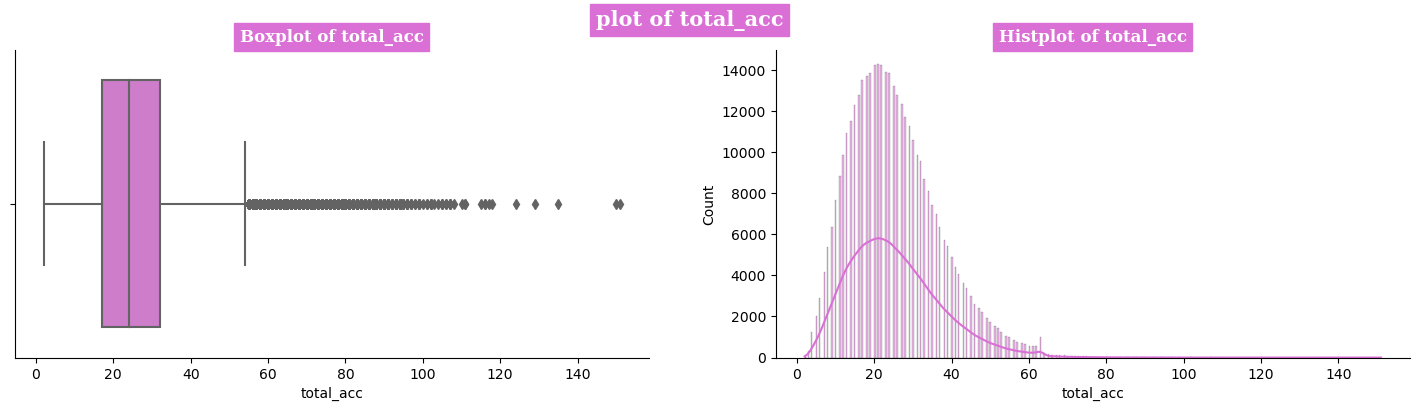

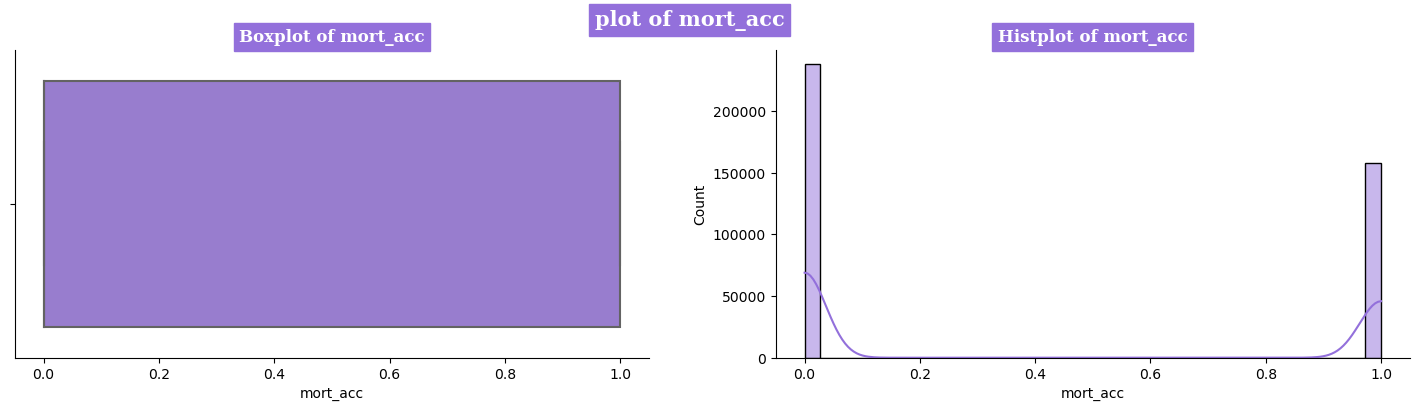

In [54]:
plt.style.use('default')
outlier_graphical_cols= num_cols.iloc[:,[0,2,3,4,5,6,8,9,10]]
for i,col in enumerate(outlier_graphical_cols.columns):
    plt.figure(figsize=(18,4))
    plt.suptitle(f'plot of {col}',fontsize=15,fontfamily='serif',fontweight='bold',backgroundcolor=cp[i],color='w')
    plt.subplot(121)
    sns.boxplot(x=df[col],color=cp[i])
    plt.title(f'Boxplot of {col}',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[i],color='w')
    plt.subplot(122)
    sns.histplot(x=df[col],kde=True,color=cp[i])
    plt.title(f'Histplot of {col}',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[i],color='w')
    sns.despine()
    plt.show()

Insights:
1. There is a considerable presence of outliers calling for their suitable treatment
2. Features such as pub_rec, mort_acc and dti show a sparse distribution of unique values indicating the potential benefit of generating binary features from these variables

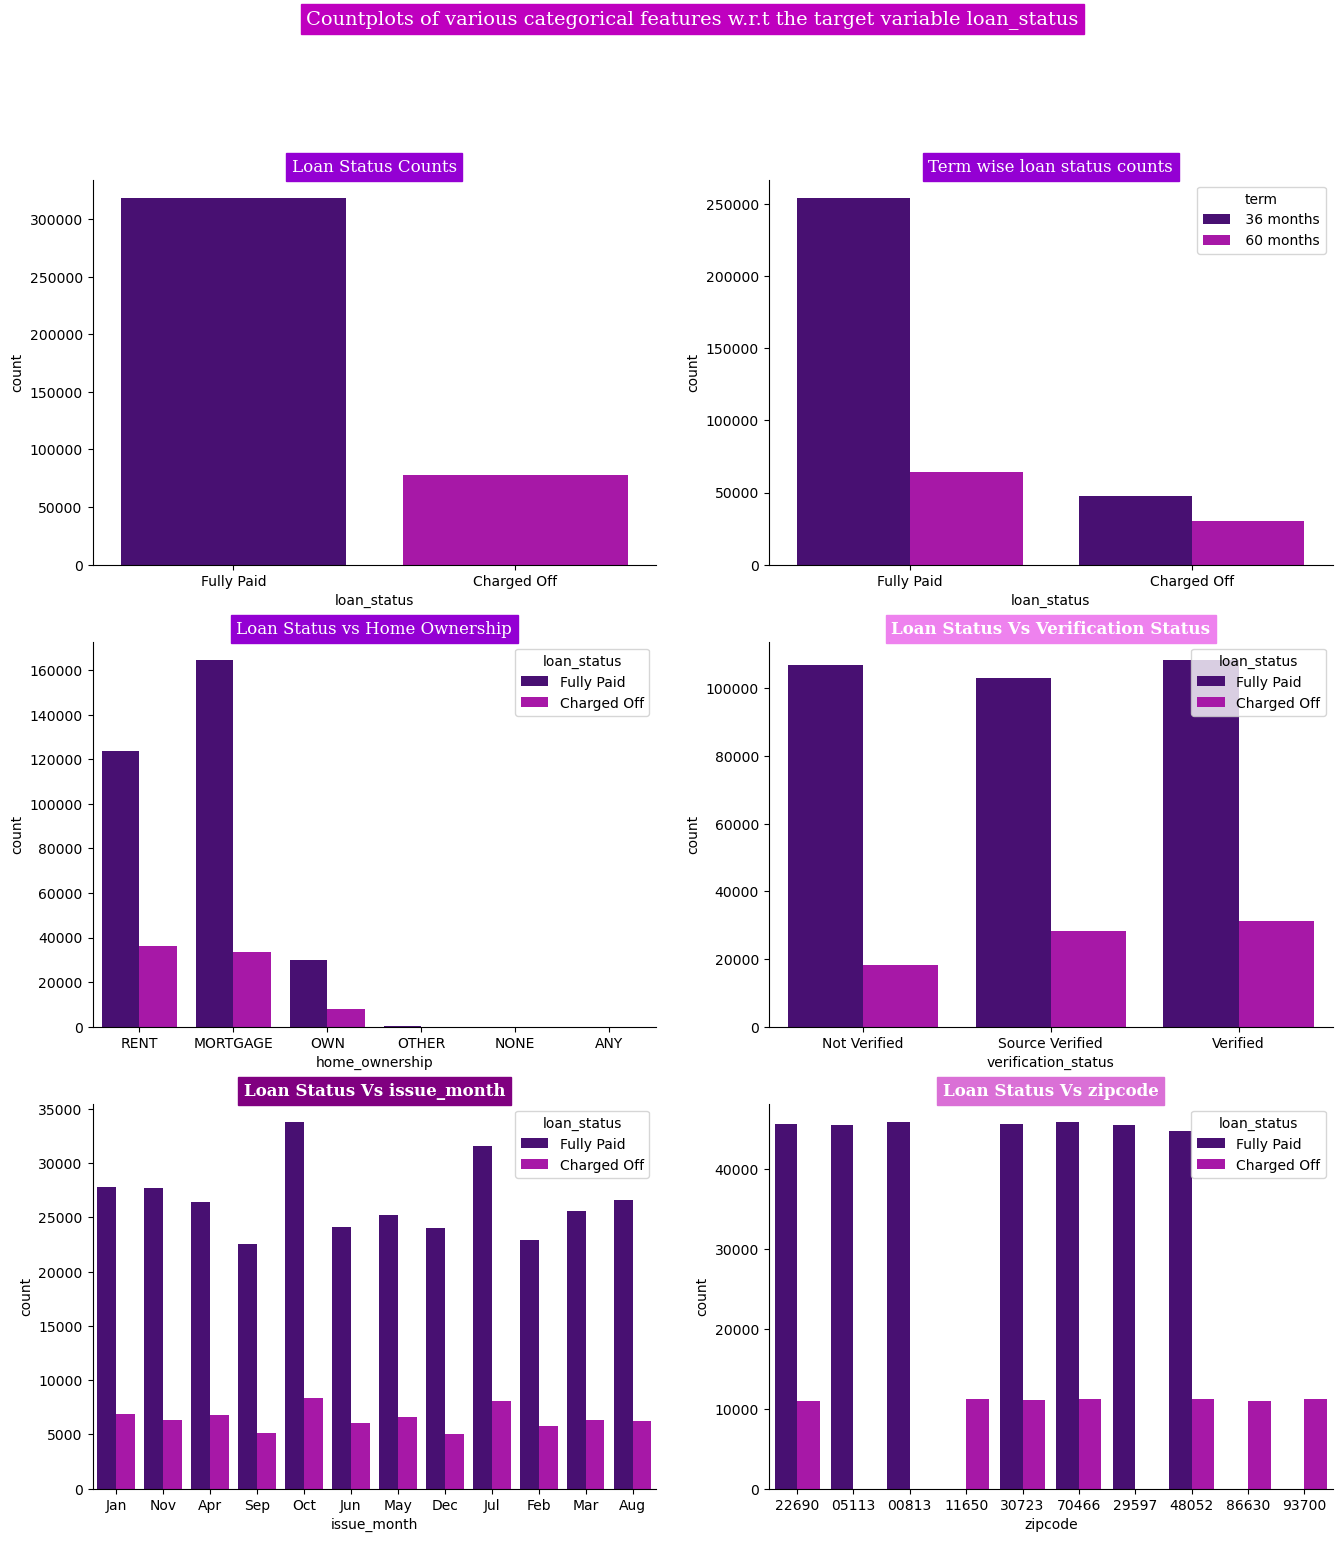

In [56]:
## Countplots of various categorical variables wrt to the target variable of loan status
plt.figure(figsize=(16,17))
plt.suptitle('Countplots of various categorical features w.r.t the target variable loan_status',
             fontsize=14,fontfamily='serif',backgroundcolor=cp[1],color='w')
plt.subplot(321)
sns.countplot(data=df,x='loan_status',palette=cp)
plt.title('Loan Status Counts',fontsize=12,fontfamily='serif',backgroundcolor=cp[2],color='w')
plt.subplot(322)
sns.countplot(data=df,x='loan_status', hue='term',palette=cp)
plt.title('Term wise loan status counts',fontsize=12,fontfamily='serif',backgroundcolor=cp[2],color='w')
plt.subplot(323)
sns.countplot(data=df, x='home_ownership',hue='loan_status',palette=cp)
plt.title('Loan Status vs Home Ownership',fontsize=12,fontfamily='serif',backgroundcolor=cp[2],color='w')
plt.subplot(324)
sns.countplot(data=df,x='verification_status',hue='loan_status',palette=cp)
plt.title('Loan Status Vs Verification Status',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[5],color='w')
plt.subplot(325)
sns.countplot(data=df, x='issue_month', hue='loan_status',palette=cp)
plt.title('Loan Status Vs issue_month',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[6],color='w')
plt.subplot(326)
sns.countplot(data=df, x='zipcode', hue='loan_status',palette=cp)
plt.title('Loan Status Vs zipcode',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[7],color='w')
sns.despine()
plt.show()

In [57]:
zip_codes=['11650','86630','93700']
states=df[df['zipcode'].isin(zip_codes)]['state']

for zip_code,state in zip(zip_codes, states):
    print(f'Zip code : {zip_code}, State : {state}')

Zip code : 11650, State : VA
Zip code : 86630, State : MI
Zip code : 93700, State : MD


Loans haven't been repaid in the following zip codes and states : 
1. Zip code : 11650, State : VA
2. Zip code : 86630, State : MI
3. Zip code : 93700, State : MD

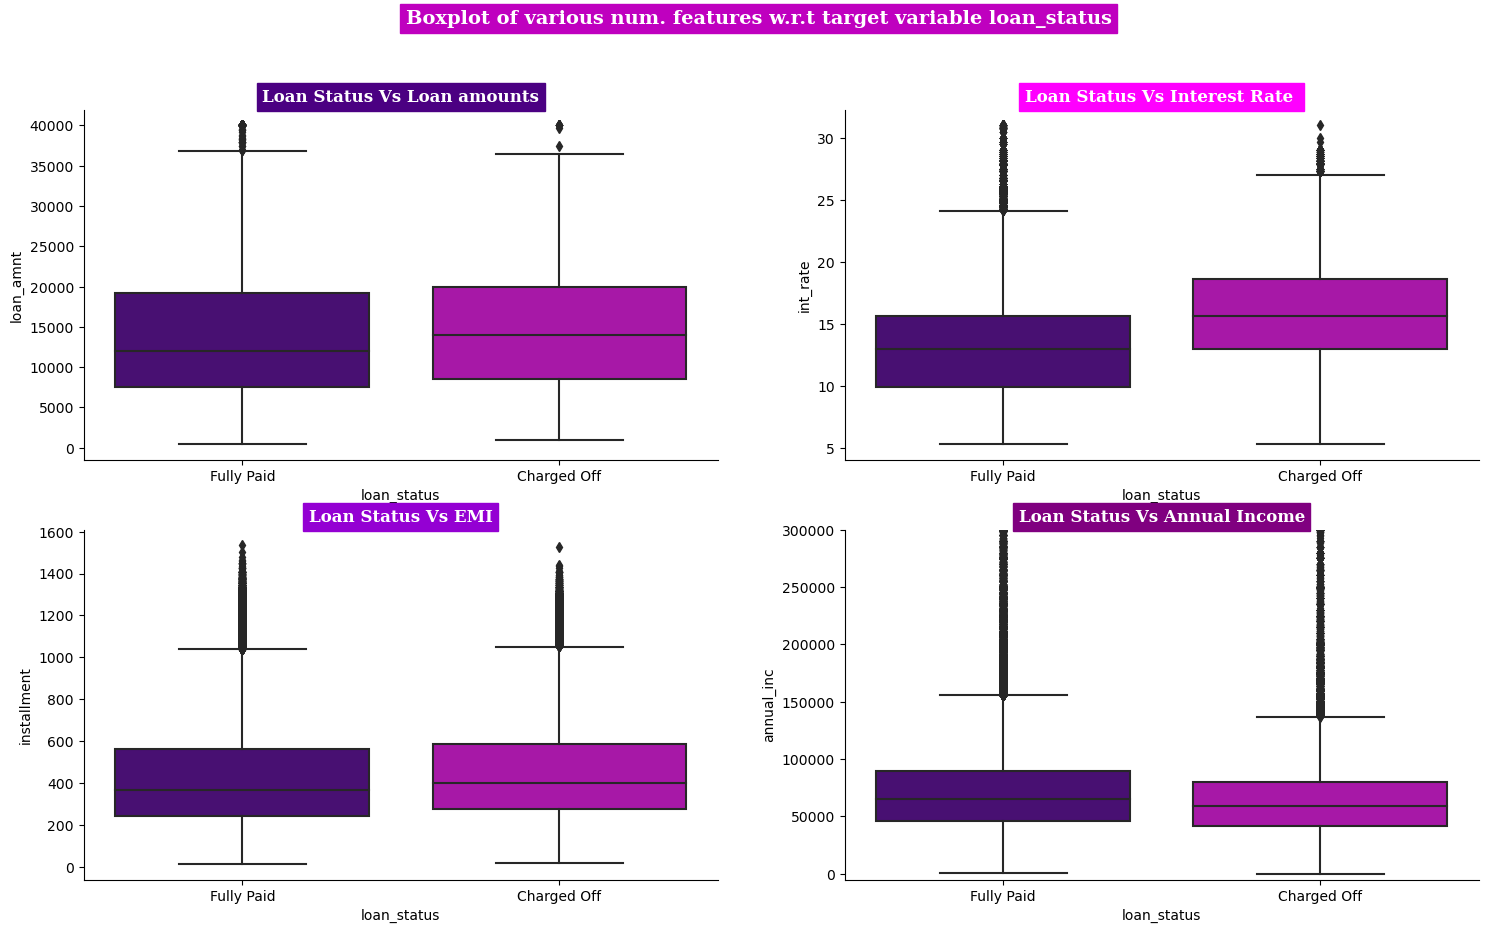

In [59]:
# Boxplot of various num features wrt the target variable loan_status
plt.figure(figsize=(18,10))
plt.suptitle('Boxplot of various num. features w.r.t target variable loan_status',
             fontsize=14, fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')
plt.subplot(221)
sns.boxplot(data=df, x='loan_status', y='loan_amnt',palette=cp)
plt.title('Loan Status Vs Loan amounts',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[0],color='w')
plt.subplot(222)
sns.boxplot(data=df, x='loan_status', y='int_rate',palette=cp)
plt.title('Loan Status Vs Interest Rate ',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[3],color='w')
plt.subplot(223)
sns.boxplot(data=df, x='loan_status', y='installment',palette=cp)
plt.title('Loan Status Vs EMI',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[2],color='w')
plt.subplot(224)
sns.boxplot(data=df, x='loan_status', y='annual_inc',palette=cp)
plt.ylim(bottom=-5000, top=300000)
plt.title('Loan Status Vs Annual Income',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[6],color='w')
sns.despine()
plt.show()

1. Charged off customers show a notably higher median interest rate compared to fully paid customers
2. Charged off customers show to have a slightly higher median installment amount as compared to Fully paid customers
3. Fully paid customers show to have a slightly higher median annual income as compared to charged off customers
4. Charged off customers show to have a greater median loan amount as compared to fully paid customers

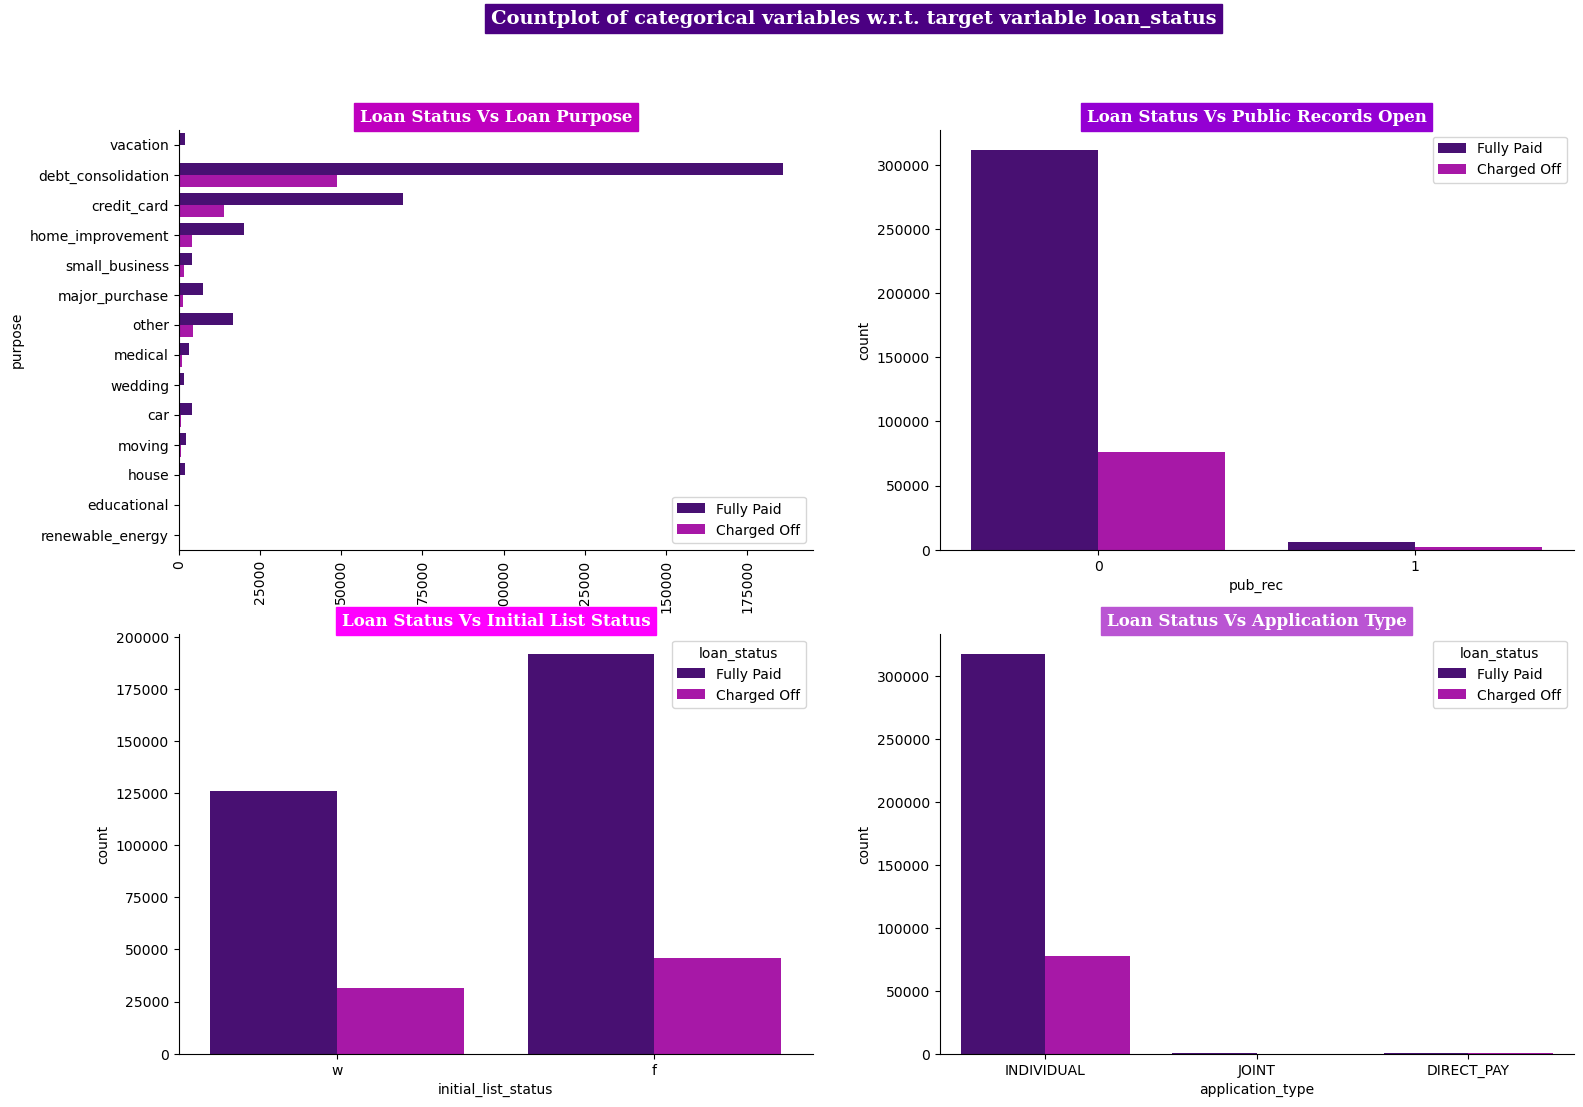

In [61]:
#Countplot of categorical variables w.r.t. target variable loan_status
plt.figure(figsize=(18,12))
plt.suptitle('Countplot of categorical variables w.r.t. target variable loan_status',
fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor=cp[0],color='w')
plt.subplot(221)
sns.countplot(data=df, y='purpose', hue='loan_status',palette=cp)
plt.xticks(rotation=90)
plt.title('Loan Status Vs Loan Purpose',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')
plt.legend(loc=4)
plt.subplot(222)
sns.countplot(data=df, x='pub_rec',hue='loan_status',palette=cp)
plt.title('Loan Status Vs Public Records Open',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[2],color='w')
plt.legend(loc=1)
plt.subplot(223)
sns.countplot(data=df, x='initial_list_status', hue='loan_status',palette=cp)
plt.title('Loan Status Vs Initial List Status',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[3],color='w')
plt.subplot(224)
sns.countplot(data=df, x='application_type',hue='loan_status',palette=cp)
plt.title('Loan Status Vs Application Type',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[4],color='w')
sns.despine()
plt.show()

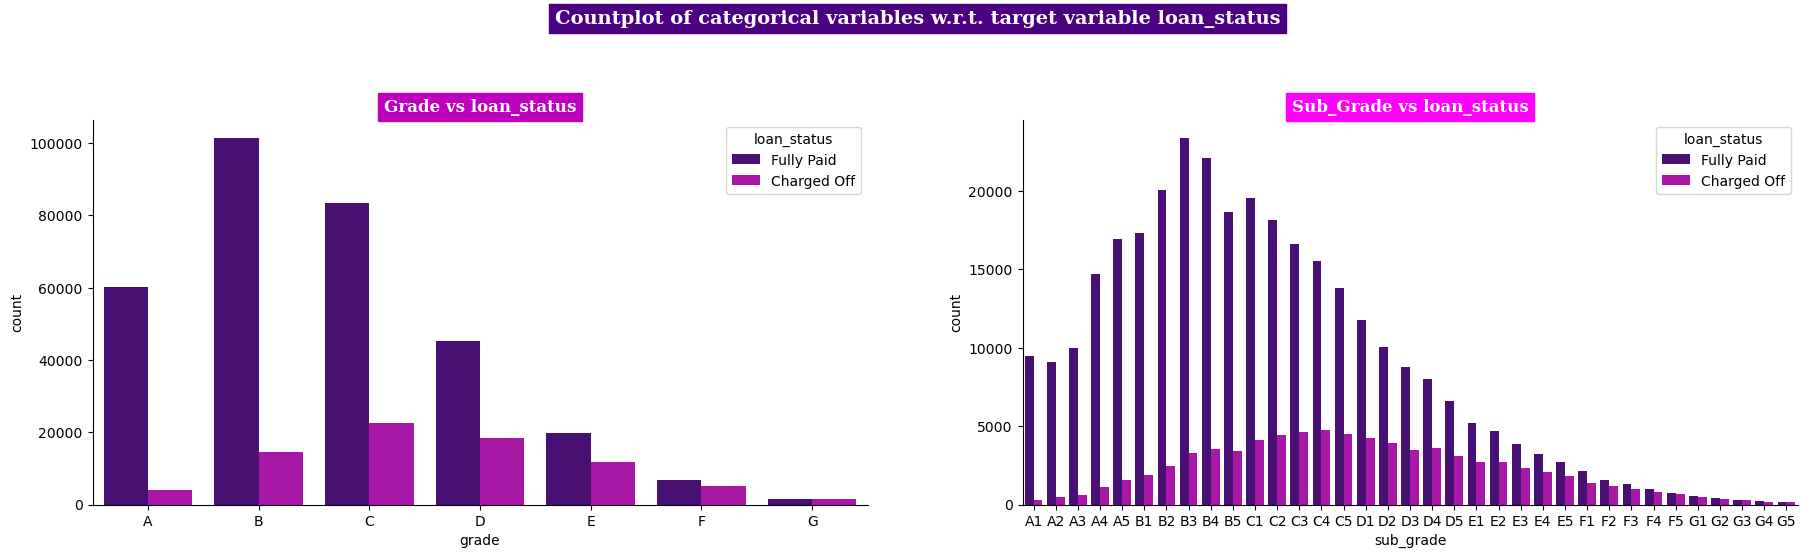

In [62]:
plt.figure(figsize=(22,11))
plt.suptitle('Countplot of categorical variables w.r.t. target variable loan_status',
fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor=cp[0],color='w')
plt.subplot(221)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade,palette=cp)
plt.title('Grade vs loan_status',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')
plt.subplot(222)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade,palette=cp)
plt.title('Sub_Grade vs loan_status',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[3],color='w')
sns.despine()
plt.show()

1. Top 2 loan purpose categories are debt consolidation and credit card
2. Most opted for loan application type is Individual

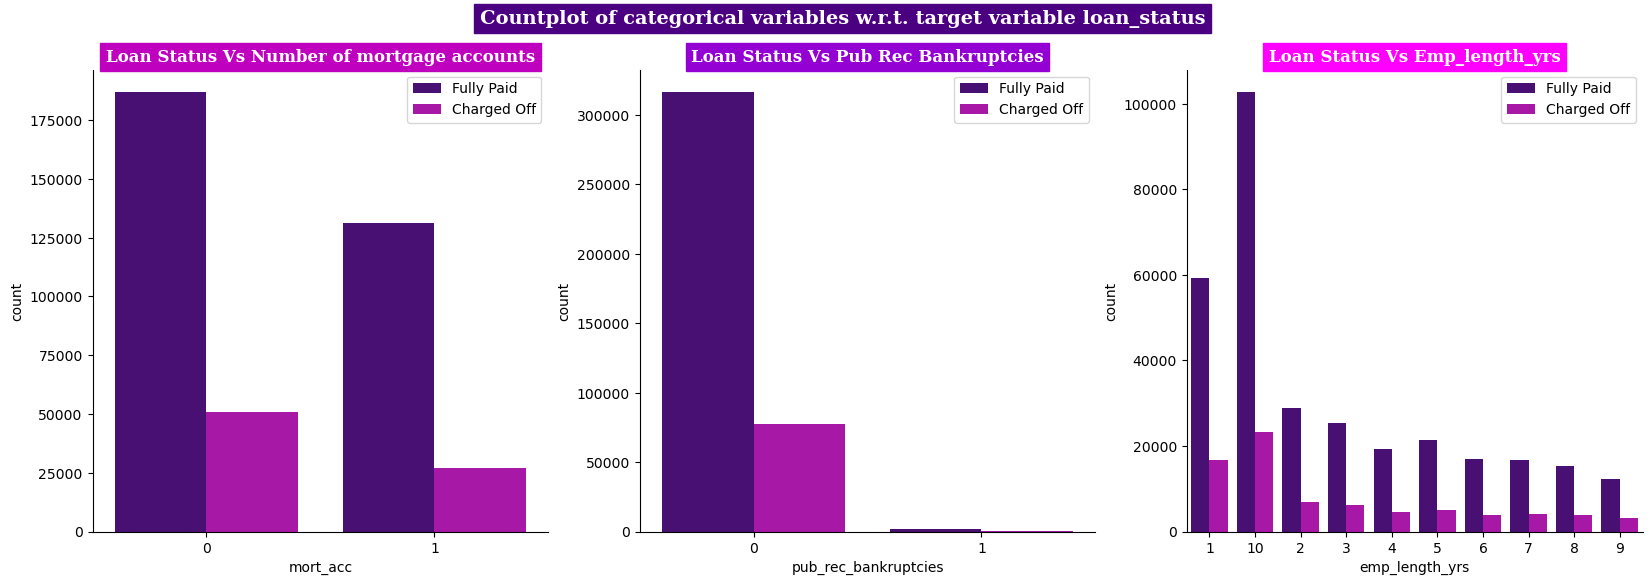

In [64]:
#Countplot for various categorical features w.r.t. target variable loan_status
plt.figure(figsize=(20,6))
plt.suptitle('Countplot of categorical variables w.r.t. target variable loan_status',
fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor=cp[0],color='w')
plt.subplot(131)
sns.countplot(data=df, x='mort_acc',hue='loan_status',palette=cp)
plt.title('Loan Status Vs Number of mortgage accounts',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')
plt.legend(loc=1)
plt.subplot(132)
sns.countplot(data=df, x='pub_rec_bankruptcies',hue='loan_status',palette=cp)
plt.title('Loan Status Vs Pub Rec Bankruptcies',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[2],color='w')
plt.legend(loc=1)
plt.subplot(133)
order = sorted(df.emp_length_yrs.unique().tolist())
sns.countplot(data=df, x='emp_length_yrs',hue='loan_status',order=order,palette=cp)
plt.title('Loan Status Vs Emp_length_yrs',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[3],color='w')
plt.legend(loc=1)
sns.despine()
plt.show()

## Comment about the correlation between Loan Amount and Installment Features. 

In [66]:
df[['loan_amnt','installment']].corr()

,loan_amnt,installment
loan_amnt,1.000000,0.953929
installment,0.953929,1.000000


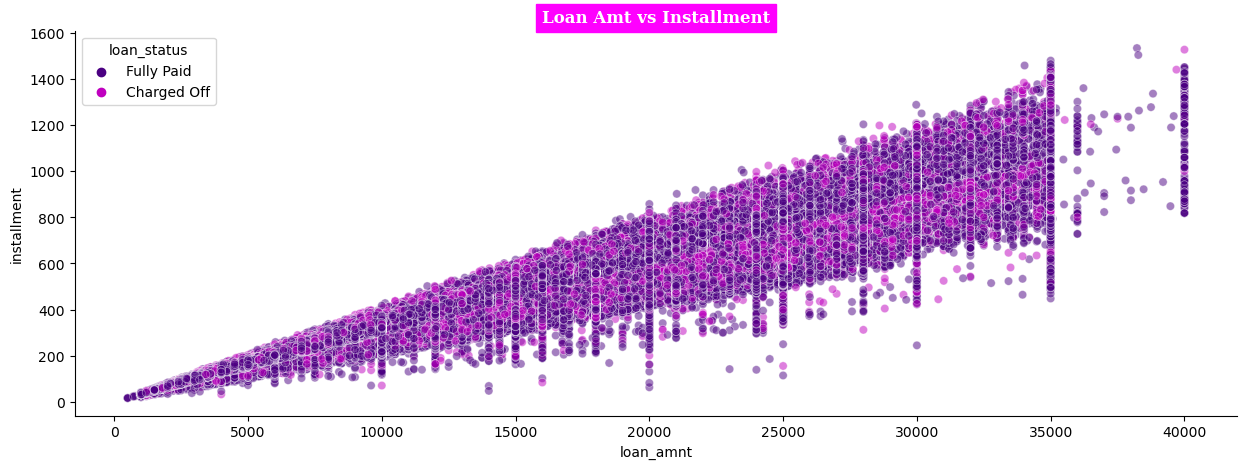

In [67]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='loan_amnt',y='installment',alpha=0.5,hue='loan_status',palette=cp)
plt.title('Loan Amt vs Installment', fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[3],color='w')
sns.despine()
plt.show()

Correlation coeff measures the strength and direction of the linear relationship between two variables. In this case, the correlation coeff between loan_amnt and installment is quite high, approx 0.95 indicating a strong positive linear relationship between the two variables.  

- Loan Terms: Understanding the relationship between loan_amnt and installment payments is crucial for setting appropriate loan terms.
- Potential Multicollinearity : When building predictive models it's essential to be cautious of multicollinearity between highly correlated predictor variables. Multicollinearity can lead to unstable estimates and difficulties in interpreting the model coefficients. 

## The majority of people have home ownership as __ :

In [70]:
(df['home_ownership'].value_counts(normalize=True)*100).to_frame()

,home_ownership
MORTGAGE,50.084085
RENT,40.347953
OWN,9.531096
OTHER,0.028281
NONE,0.007828
ANY,0.000758


##Insights:
- The majority of home ownership comprises of mortgage holders with approx 50.08%, indicating that a significant number of individuals own homes through mortgage payments
- Renters constitute another substantial portion with around 40.34% compared to only 9.53% who fully own their homes. This suggests that a sizable demographic of individuals opt for renting rather than owning their homes

## People with grades ‘A’ are more likely to fully pay their loan. (T/F)

In [73]:
pd.crosstab(df['grade'],df['loan_status'],normalize='index')

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611


Based on the table above it is clearly seen that people under the grade A category show a significantly higher likelihood of paying off their loans compared to any other category. (Approx 93.71%)

- This suggests that borrowers with the 
highest credit rating are more inclined to fulfill their loan obligations successfully
- 
The proportion of charged-off loans for grade 'A' borrowers is relatively low, standing at approximately 6.29%. This indicates a low default rate among borrowers with the highest credit rating,
emphasizing their creditworthiness and reliability in loan repayment. 

## Name the top 2 afforded job titles. 

In [76]:
df[df['emp_title'] != 'No Employee Title']['emp_title'].value_counts().to_frame().head()

,emp_title
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830


In [77]:
df.groupby('emp_title')['loan_status'].count().sort_values(ascending=False).to_frame()[1:6]

,loan_status
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830


The most afforded job titles are Teachers and Managers

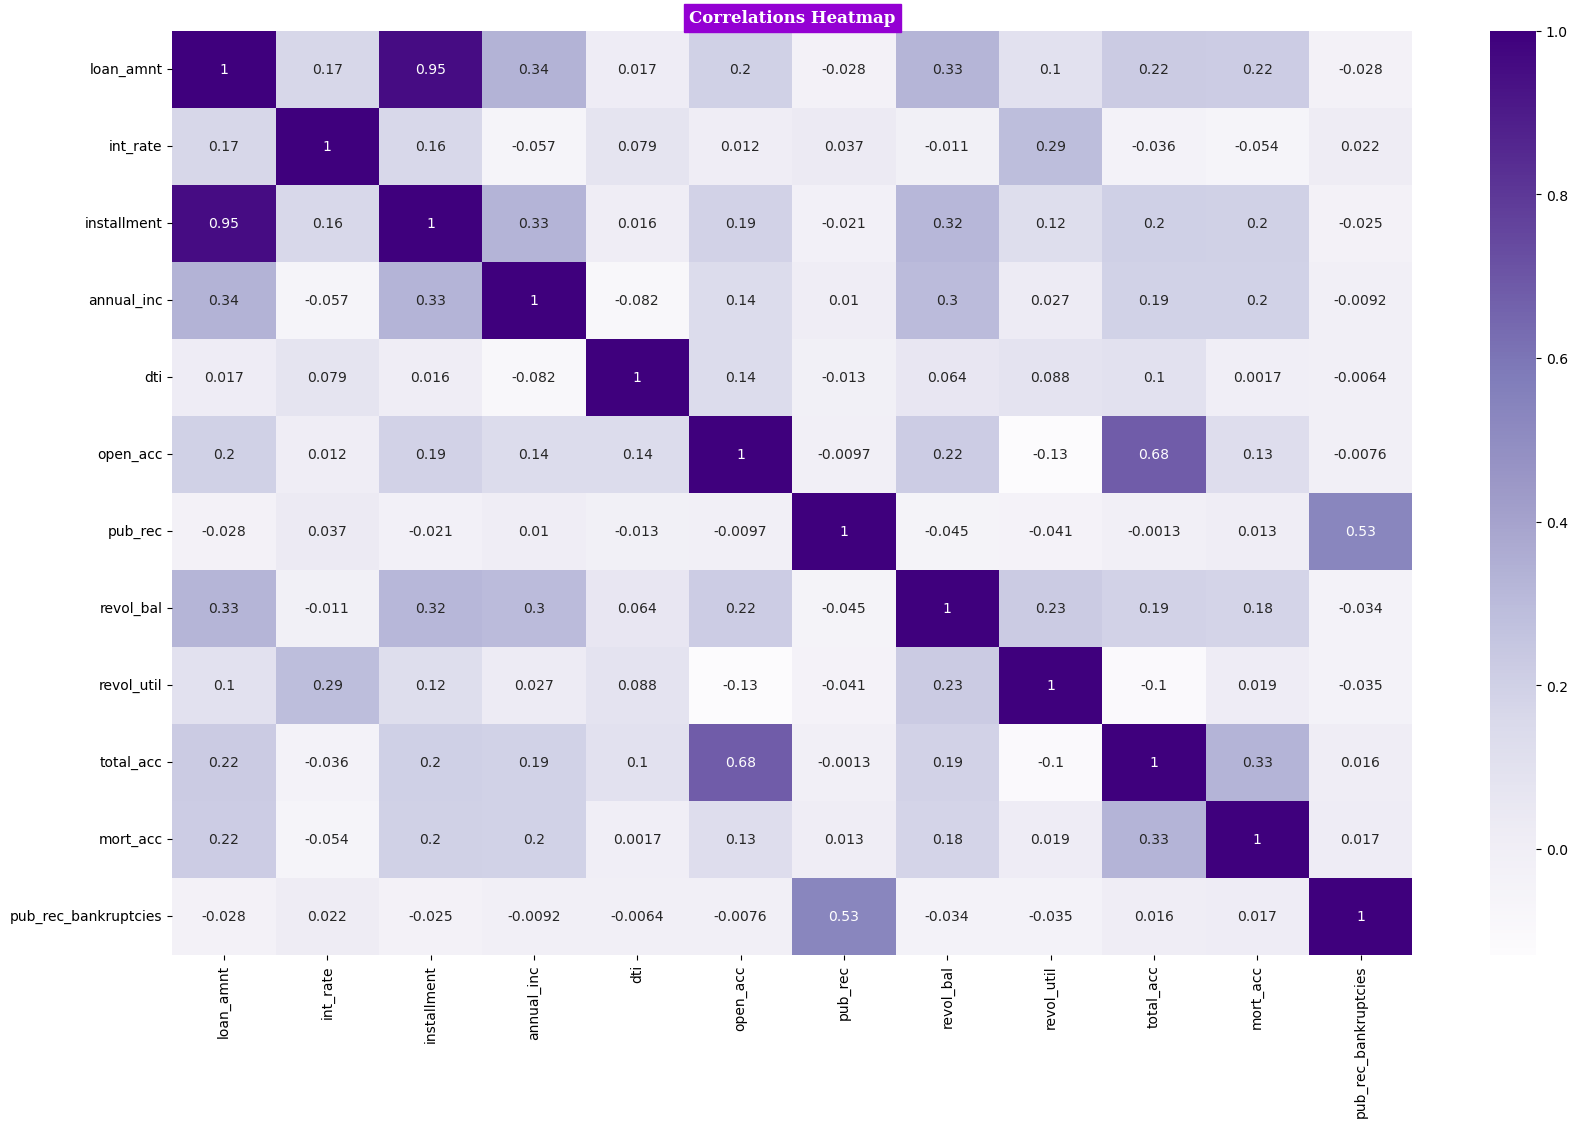

In [79]:
plt.figure(figsize=(20,12))
sns.heatmap(num_cols.corr(),annot=True,cmap='Purples')
plt.title('Correlations Heatmap',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[2],color='w')
plt.show()

Observations:
- There exists a strong correlation between loan amount and installment amount
- Also total_acc and open_acc exhibit a significant correlation
- There is a notable correlation between pub_rec and pub_rec_bankruptcies

## Outlier Treatment

In [82]:
numerical_cols=df.select_dtypes(include=np.number).columns
numerical_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [83]:
#Outlier Treatment

def remove_outliers_zscore(df,threshold=2): #(considering 2 std dev. away from mean approx 95% of data)
    """
    Remove outliers from a Dataframe using the Z-score method. 

    Parameters:
        df(DataFrame) : The input DataFrame
        threshold(float) : The z-score threshold for identifying outliers.
                            Observations with a z-score greater than this threshold will be considered as outliers.  

    Returns:
        Dataframe:The Dataframe with outliers removed.
    """
    #Calculate Z-score for numerical columns
    z_scores =(df[numerical_cols] - df[numerical_cols].mean()) /df[numerical_cols].std()

    #Identify outliers
    outliers= np.abs(z_scores) > threshold

    #Keep non-outliers for numerical columns
    df_cleaned = df[~outliers.any(axis=1)]

    return df_cleaned

cleaned_df=remove_outliers_zscore(df1)
print(cleaned_df.shape)

(311392, 30)


In [84]:
def clip_outliers_zscore(df,threshold=2):
    """
    Clip outliers in a Dataframe using the Z-score method.

    Parameters:
    df(Dataframe) : The input Dataframe
    threshold(float) : The z-score threshold for identifying outliers.
                        Observations with a z-score greater than the threshold will be considered as outliers.
    Returns:
        Dataframe:The Dataframe with outliers clipped.
    """
    z_score= (df[numerical_cols]-df[numerical_cols].mean()) / df[numerical_cols].std()

    #Clip outliers
    clipped_values= df[numerical_cols].clip(df[numerical_cols].mean() - threshold *df[numerical_cols].std(),
                                            df[numerical_cols].mean() + threshold * df[numerical_cols].std(),
                                            axis=1)
    #Assign clipped values to OG dataframe
    df_clipped = df.copy()
    df_clipped[numerical_cols] = clipped_values

    return df_clipped

clipped_df=clip_outliers_zscore(df1)
print(clipped_df.head())

   loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title home_ownership  annual_inc verification_status  \
0                Marketing           RENT    117000.0        Not Verified   
1          Credit analyst        MORTGAGE     65000.0        Not Verified   
2             Statistician           RENT     43057.0     Source Verified   
3          Client Advocate           RENT     54000.0        Not Verified   
4  Destiny Management Inc.       MORTGAGE     55000.0            Verified   

   loan_status             purpose                    title    dti  open_acc  \
0   Fully Paid            vacation                 Vac

In [85]:
data = cleaned_df.copy()
cp_data= clipped_df.copy()
data.sample()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_line_m,earliest_cr_line_y,state,zipcode,emp_length_yrs
302011,30000.0,60 months,21.99,828.4,E,E4,Director of Business Process Improvement,MORTGAGE,71302.15,Verified,Charged Off,debt_consolidation,Debt consolidation,21.51,13.0,0,14348.0,83.0,17.0,f,INDIVIDUAL,0,0,Mar,2014,May,2002,MA,11650,10


In [86]:
data['pub_rec_bankruptcies'].value_counts(), data['pub_rec'].value_counts()

(0    311392
 Name: pub_rec_bankruptcies, dtype: int64,
 0    311392
 Name: pub_rec, dtype: int64)

In [87]:
cp_data['pub_rec_bankruptcies'].value_counts(), cp_data['pub_rec'].value_counts()

(0.000000    393705
 0.158662      2325
 Name: pub_rec_bankruptcies, dtype: int64,
 0.000000    388011
 0.301947      8019
 Name: pub_rec, dtype: int64)

In [88]:
data.shape

(311392, 30)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311392 entries, 0 to 396029
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             311392 non-null  float64
 1   term                  311392 non-null  object 
 2   int_rate              311392 non-null  float64
 3   installment           311392 non-null  float64
 4   grade                 311392 non-null  object 
 5   sub_grade             311392 non-null  object 
 6   emp_title             311392 non-null  object 
 7   home_ownership        311392 non-null  object 
 8   annual_inc            311392 non-null  float64
 9   verification_status   311392 non-null  object 
 10  loan_status           311392 non-null  object 
 11  purpose               311392 non-null  object 
 12  title                 311392 non-null  object 
 13  dti                   311392 non-null  float64
 14  open_acc              311392 non-null  float64
 15  

## Manual Encoding

In [91]:
data['loan_status']=data.loan_status.map({'Fully Paid' :1 , 'Charged Off':0})

data['initial_list_status']=data.initial_list_status.map({'w':0,'f':1})

In [92]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_line_m,earliest_cr_line_y,state,zipcode,emp_length_yrs
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,1,vacation,Vacation,26.24,16.0,0,36369.0,41.8,25.0,0,INDIVIDUAL,0,0,Jan,2015,Jun,1990,OK,22690,10
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,Debt consolidation,22.05,17.0,0,20131.0,53.3,27.0,1,INDIVIDUAL,1,0,Jan,2015,Jul,2004,SD,05113,4
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,1,credit_card,Credit card refinancing,12.79,13.0,0,11987.0,92.2,26.0,1,INDIVIDUAL,0,0,Jan,2015,Aug,2007,WV,05113,1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,1,credit_card,Credit card refinancing,2.60,6.0,0,5472.0,21.5,13.0,1,INDIVIDUAL,0,0,Nov,2014,Sep,2006,MA,00813,6
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,0,credit_card,Credit Card Refinance,33.95,13.0,0,24584.0,69.8,43.0,1,INDIVIDUAL,0,0,Apr,2013,Mar,1999,VA,11650,9


# Feature Selection - Done by Hypothesis Testing and VIF(Multicollinearity)

In [94]:
def calc_vif(X):
    vif=pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i ) for i in range (X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

In [95]:
cat_cols = data.select_dtypes(include=['object']).columns.to_list()
for col in cat_cols:
    chi2,p,dof,expected=chi2_contingency(pd.crosstab(data[col],data['loan_status']))
    if p> 0.05:
        print(' Independent feature-Not Significant :',col,' >> p value :',p)

 Independent feature-Not Significant : emp_title  >> p value : 0.5367121560200798
 Independent feature-Not Significant : title  >> p value : 1.0
 Independent feature-Not Significant : earliest_cr_line_m  >> p value : 0.2722117086158036
 Independent feature-Not Significant : state  >> p value : 0.76047808977373


In [96]:
lt=data.drop(columns=['emp_title','title','sub_grade','earliest_cr_line_m','earliest_cr_line_y','initial_list_status',
                      'state','issue_month','issue_year','pub_rec','pub_rec_bankruptcies'],axis=1)
lt.shape

(311392, 19)

In [97]:
lt.sample()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,application_type,mort_acc,zipcode,emp_length_yrs
301929,12000.0,36 months,9.49,384.34,B,RENT,82500.0,Source Verified,1,debt_consolidation,15.67,11.0,6662.0,69.4,28.0,INDIVIDUAL,0,30723,1


In [98]:
## Performing One hot encoding on feature having multiple variable
dummies=['zipcode','grade','purpose','home_ownership','verification_status','application_type']
ltd=pd.get_dummies(lt,columns=dummies,drop_first=True)*1

ltd

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc,emp_length_yrs,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36 months,11.44,329.48,117000.0,1,26.24,16.0,36369.0,41.8,25.0,0,10,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,8000.0,36 months,11.99,265.68,65000.0,1,22.05,17.0,20131.0,53.3,27.0,1,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,15600.0,36 months,10.49,506.97,43057.0,1,12.79,13.0,11987.0,92.2,26.0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,7200.0,36 months,6.49,220.65,54000.0,1,2.60,6.0,5472.0,21.5,13.0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,24375.0,60 months,17.27,609.33,55000.0,0,33.95,13.0,24584.0,69.8,43.0,0,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,40000.0,1,15.63,6.0,1990.0,34.3,23.0,0,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
396026,21000.0,36 months,12.29,700.42,110000.0,1,21.45,6.0,43263.0,95.7,8.0,0,5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
396027,5000.0,36 months,9.99,161.32,56500.0,1,17.56,15.0,32704.0,66.9,23.0,0,10,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
396028,21000.0,60 months,15.31,503.02,64000.0,1,15.88,9.0,15704.0,53.8,20.0,1,10,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [99]:
ltd.shape

(311392, 50)

In [100]:
# Remove 'months' and convert the column to numeric
ltd['term'] = ltd['term'].str.replace(' months', '').astype(int)

In [101]:
ltd.dtypes

loan_amnt                              float64
term                                     int32
int_rate                               float64
installment                            float64
annual_inc                             float64
loan_status                              int64
dti                                    float64
open_acc                               float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
mort_acc                                 int64
emp_length_yrs                          object
zipcode_05113                            uint8
zipcode_11650                            uint8
zipcode_22690                            uint8
zipcode_29597                            uint8
zipcode_30723                            uint8
zipcode_48052                            uint8
zipcode_70466                            uint8
zipcode_86630                            uint8
zipcode_93700

In [102]:
ltd.sample(7)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc,emp_length_yrs,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT
373330,6075.0,36,7.62,189.31,22000.00,1,26.45,6.0,7251.0,47.7,8.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
327132,14800.0,36,12.99,498.60,86000.00,1,13.61,11.0,11840.0,49.7,20.0,1,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
10519,25000.0,36,7.89,782.15,110000.00,1,12.02,12.0,14482.0,28.1,19.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
244794,9600.0,36,14.09,328.53,40000.00,1,10.20,10.0,12025.0,43.3,13.0,0,6,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
240313,6000.0,36,6.03,182.62,75000.00,1,27.83,8.0,3088.0,14.1,33.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
296521,24975.0,60,13.99,581.00,66670.36,0,16.26,10.0,20857.0,68.6,27.0,0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
335400,15000.0,60,22.40,417.71,67000.00,1,13.13,9.0,17547.0,98.6,14.0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


## Model

In [104]:
#Prepare the dataset i.e X and y which makes up the dependent and independent variables

X=ltd.drop(['loan_status'],axis=1)
y=ltd['loan_status']

In [105]:
# Split the data into train and test

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(249113, 49)
(62279, 49)
(249113,)
(62279,)


Minmax scaling the data

In [107]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train= pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [108]:
X_train.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc,emp_length_yrs,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT
0,0.379538,0.0,0.339161,0.411590,0.207250,0.465341,0.368421,0.171897,0.419816,0.276596,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.643564,1.0,0.680070,0.524221,0.367868,0.252652,0.473684,0.221905,0.590398,0.340426,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.168317,0.0,0.208625,0.176198,0.134712,0.357576,0.368421,0.052236,0.304392,0.212766,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.379538,1.0,0.680070,0.307444,0.367868,0.449242,0.315789,0.255109,0.767109,0.297872,1.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.368812,0.0,0.543706,0.421460,0.246109,0.315530,0.263158,0.090649,0.614913,0.361702,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Model-1

In [110]:
#Fit the Model on training data

logreg_model=LogisticRegression()
logreg_model.fit(X_train,y_train)

LogisticRegression()

In [111]:
#Predict the data on test  dataset
y_train_pred= logreg_model.predict(X_train)
y_test_pred=logreg_model.predict(X_test)

In [112]:
logreg_model.score(X_test,y_test) , logreg_model.score(X_test,y_test_pred)

(0.8935917403940333, 1.0)

If logreg_model.score(X_test,y_test) consistently returns 1, it would imply that your model is predicting the test set perfectly which indicates overfitting, data leakage or an issue with the evaluation process

Train Accuracy: 0.89
Train F1 score: 0.94
Train Recall score: 1.0
Train Precision Score: 0.89

Test Accuracy: 0.89
Test F1 score: 0.94
Test Recall score: 1.0
Test Precision Score: 0.89


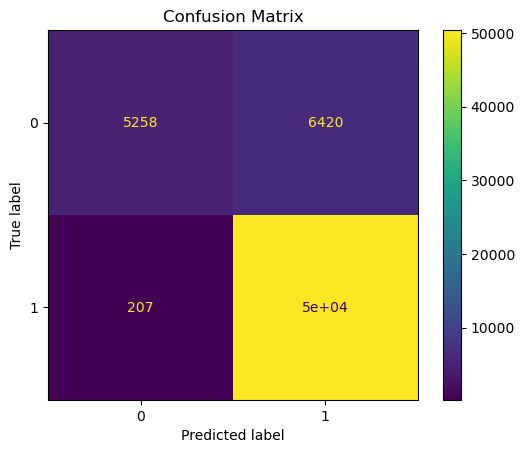

In [114]:
#Model Evaluation
print('Train Accuracy:',logreg_model.score(X_train,y_train).round(2))
print('Train F1 score:',f1_score(y_train,y_train_pred).round(2))
print('Train Recall score:',recall_score(y_train,y_train_pred).round(2))
print('Train Precision Score:',precision_score(y_train,y_train_pred).round(2))

print('\nTest Accuracy:',logreg_model.score(X_test,y_test).round(2))
print('Test F1 score:',f1_score(y_test,y_test_pred).round(2))
print('Test Recall score:',recall_score(y_test,y_test_pred).round(2))
print('Test Precision Score:',precision_score(y_test,y_test_pred).round(2))

#Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [115]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     11678
           1       0.89      1.00      0.94     50601

    accuracy                           0.89     62279
   macro avg       0.92      0.72      0.78     62279
weighted avg       0.90      0.89      0.88     62279



Here the recall value for the 'charged off' is very low. Hence we need to build a better model

## Model-2

In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
#Oversampling to balance out target variable

sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 202401
Before OverSampling, count of label 0: 46712
After OverSampling, count of label 1: 202401
After OverSampling, count of label 0: 202401


Train Accuracy : 0.79
Train F1 Score: 0.86
Train Recall Score: 0.79
Train Precision Score: 0.95

Test Accuracy : 0.8
Test F1 Score: 0.86
Test Recall Score: 0.79
Test Precision Score: 0.95


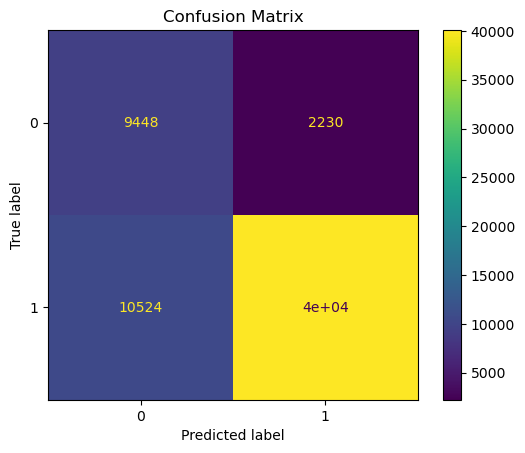

In [120]:
model=LogisticRegression()
model.fit(X_train_res,y_train_res)
train_preds=model.predict(X_train)
test_preds=model.predict(X_test)

#Model Evaluation
print('Train Accuracy :', model.score(X_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))
print('\nTest Accuracy :',model.score(X_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))
# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


In [121]:
y_pred=test_preds
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.81      0.60     11678
           1       0.95      0.79      0.86     50601

    accuracy                           0.80     62279
   macro avg       0.71      0.80      0.73     62279
weighted avg       0.86      0.80      0.81     62279



Observations:

- The model demonstrates a high recall score successfully identifying 80% of actual defaulters
- However, precision for actual defaulters is low, only 46% of predicted defaulters are actual defaulters
- The high recall and low precision indicates that while the model is effective in flagging most defaulters it also results in many false positives. As a result, many deserving customers can be denied loans
- The low precision adversely affects the f1 score reducing it to 60% despite an overall accuracy of 80%. This highlights the trade off between precision and recall in the model's performance
- The model is good at catching most people who don't pay back their loans it catches 80% of them.- 
But, when it says someone won't pay back, it's right only half of the time.47% So, there's a chance it's making mistakes and wrongly flagging people.
- 
Because of these mistakes, some people who deserve loans might not t them.m
- .
Even though the model seems okay overall, its balance between being right and not making mistakes isn't great. It's like a seesaw; when one side goes up, the other goes down.

## Regularization Model

In [124]:
#Trying with different regularization factor lambda and choose the best threshold to build the model

lamb=np.arange(0.01,10000,10)

train_scores=[]
test_scores=[]

for lam in lamb:
    model=LogisticRegression(C=1/lam)
    model.fit(X_train,y_train)

    tr_score=model.score(X_train,y_train)
    te_score=model.score(X_test,y_test)

    train_scores.append(tr_score)
    test_scores.append(te_score)


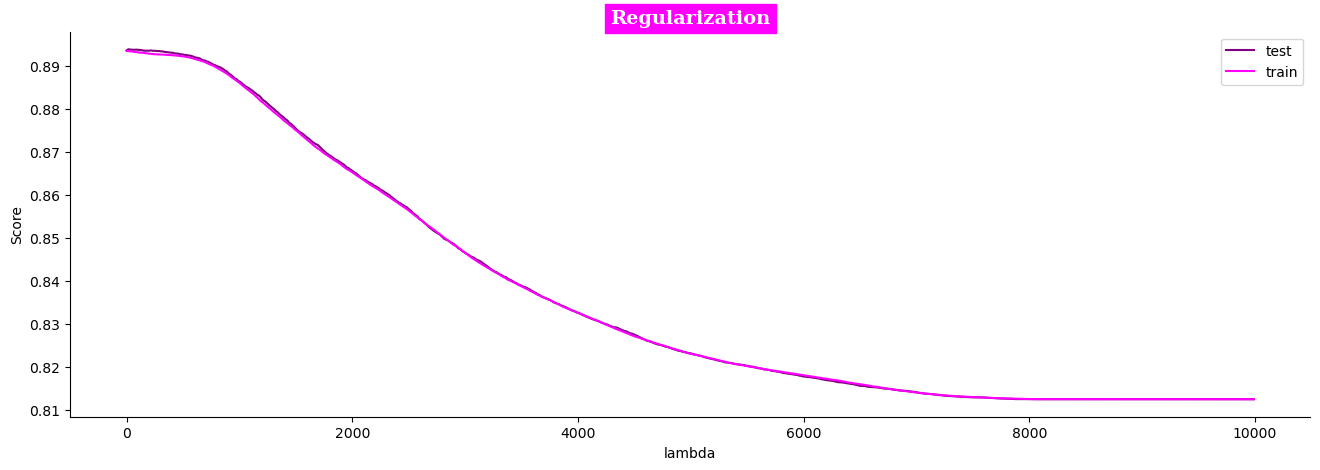

In [125]:
#Plot the train and test scores wrt Lambda values i.e regularization Factor
ran=np.arange(0.01,10000,10)
plt.figure(figsize=(16,5))
sns.lineplot(x=ran,y=test_scores,color='purple',label='test')
sns.lineplot(x=ran,y=train_scores,color='magenta',label='train')
plt.title('Regularization',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='magenta',color='w')
plt.xlabel("lambda")
plt.ylabel("Score")
sns.despine()
plt.show()

In [126]:
#Check the index of best test score and the test score

print(np.argmax(test_scores))
print(test_scores[np.argmax(test_scores)])

2
0.8939289327060486


In [127]:
#Calculate the best lambda value based on the index of the test score

best_lamb= 0.01 +(10*2)
best_lamb

20.01

In [128]:
#Fit the model using best lambda

reg_model=LogisticRegression(C=1/best_lamb)
reg_model.fit(X_train,y_train)

LogisticRegression(C=0.04997501249375312)

In [129]:
#Predict the y_values and y_probability values

y_reg_pred=reg_model.predict(X_test)
y_reg_pred_proba=reg_model.predict_proba(X_test)

In [130]:
#Print model score

print(f'Logistic Regression Model Score with best lambda:',end='')
print(round(model.score(X_test,y_test)*100,2),'%')

Logistic Regression Model Score with best lambda:81.25 %


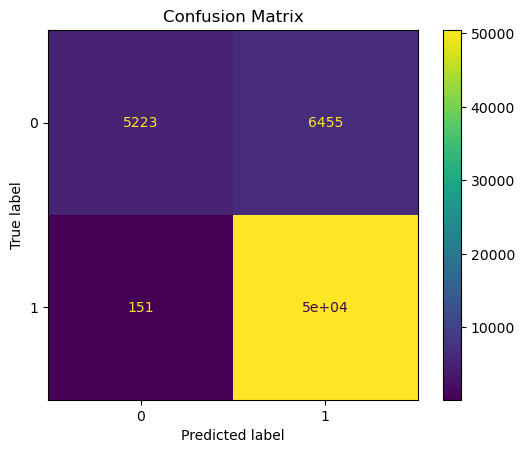

In [131]:
#Confusion Matrix

cm=confusion_matrix(y_test,y_reg_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [132]:
print(classification_report(y_test,y_reg_pred))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     11678
           1       0.89      1.00      0.94     50601

    accuracy                           0.89     62279
   macro avg       0.93      0.72      0.78     62279
weighted avg       0.90      0.89      0.88     62279



Regularized model:

- Precision:89%
- Recall:100%
- F1 score:94%
- Accuracy-89%

## K- Fold Cross Validation

In [218]:
x=scaler.fit_transform(X)

kfold=KFold(n_splits=10)
accuracy=np.mean(cross_val_score(reg_model,x,y,cv=kfold,scoring='accuracy'))
print("Cross Validation accuracy:{:.3f}".format(accuracy))

Cross Validation accuracy:0.894


In [237]:
cm=confusion_matrix(y_test,y_reg_pred)
cm_df=pd.DataFrame(cm,index=['Charged Off','Fully Paid'],columns=['Charged Off','Fully paid'])
cm_df

,Charged Off,Fully paid
Charged Off,5223,6455
Fully Paid,151,50450


💡Insights:
- TN = 5223 (True Negative: Correctly predicted Charged Off)
- TP = 50450 (True Positive: Correctly predicted Fully Paid)
- FP = 6455 (False Positive: Predicted Fully Paid but actually Charged Off)
- FN = 151 (False Negative: Predicted Charged Off but actually Fully Paid)
- Actual Negative (Charged Off) = 5223 + 6455 = 11678
- Actual Positive (Fully Paid) = 151 + 50450 = 50601
- Predicted Negative (Charged Off) = 5223 + 151 = 5374
- Predicted Positive (Fully Paid) = 6455 + 50450 = 56905

In [243]:
#Collecting model coefficient and print those in dataframe format
coeff_df=pd.DataFrame()
coeff_df['Features']=X_train_res.columns
coeff_df['Weights']=model.coef_[0]
coeff_df['ABS_Weights']=abs(coeff_df['Weights'])
coeff_df= coeff_df.sort_values(['ABS_Weights'],ascending=False)
coeff_df

,Features,Weights,ABS_Weights
13,zipcode_11650,-0.464314,0.464314
20,zipcode_93700,-0.460824,0.460824
19,zipcode_86630,-0.459431,0.459431
12,zipcode_05113,0.394072,0.394072
15,zipcode_29597,0.392713,0.392713
1,term,-0.285313,0.285313
2,int_rate,-0.274585,0.274585
24,grade_E,-0.199359,0.199359
23,grade_D,-0.197992,0.197992
21,grade_B,0.154383,0.154383


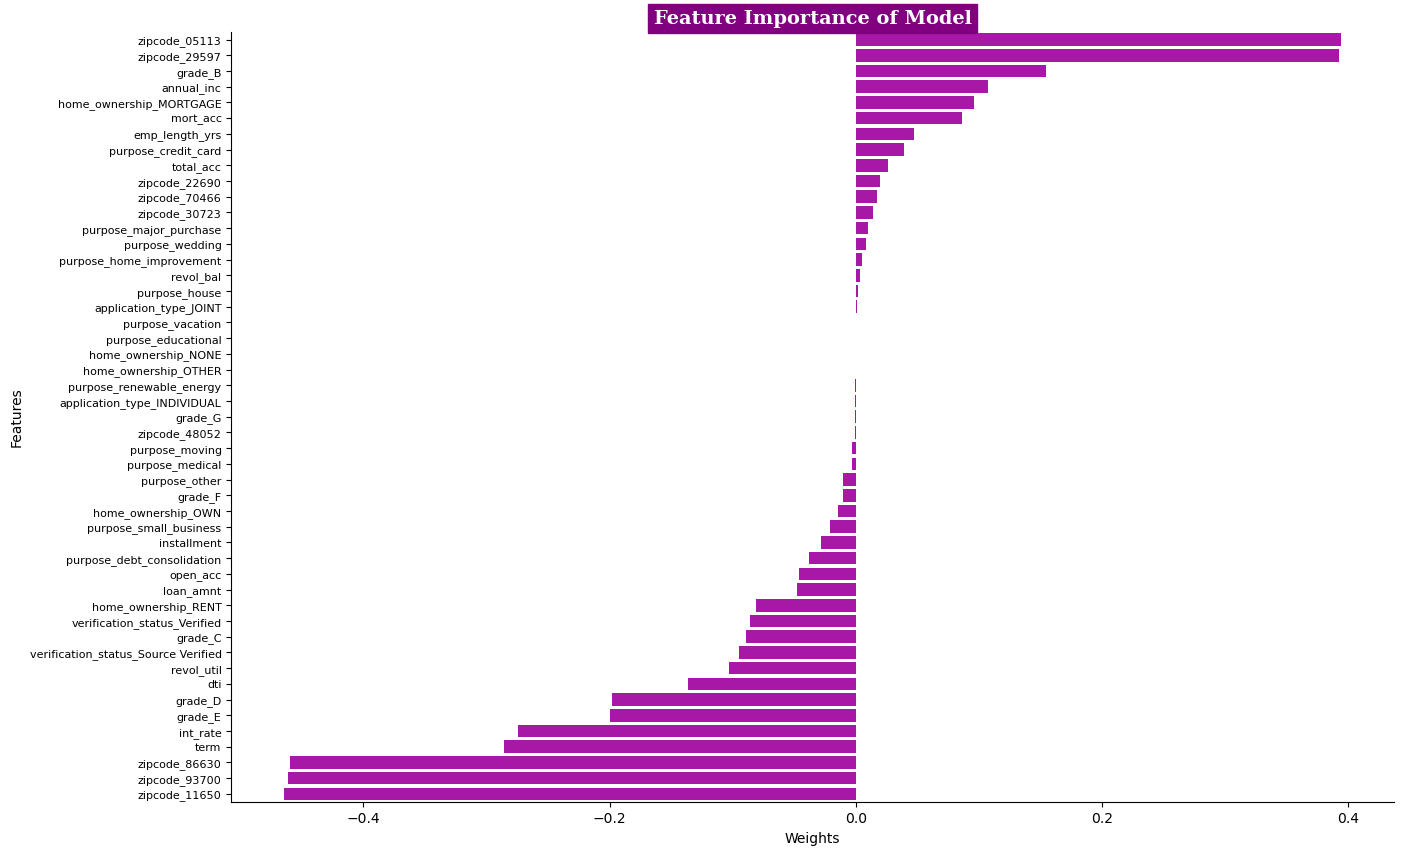

In [245]:
imp_feature=coeff_df.sort_values(by='Weights',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(y=imp_feature['Features'],
            x=imp_feature['Weights'],color='m')
plt.title("Feature Importance of Model", fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='purple',color='w')
plt.xlabel("Weights")
plt.yticks(fontsize=8)
plt.ylabel("Features")
sns.despine()
plt.show()

In [247]:
model.intercept_

array([1.76772423])

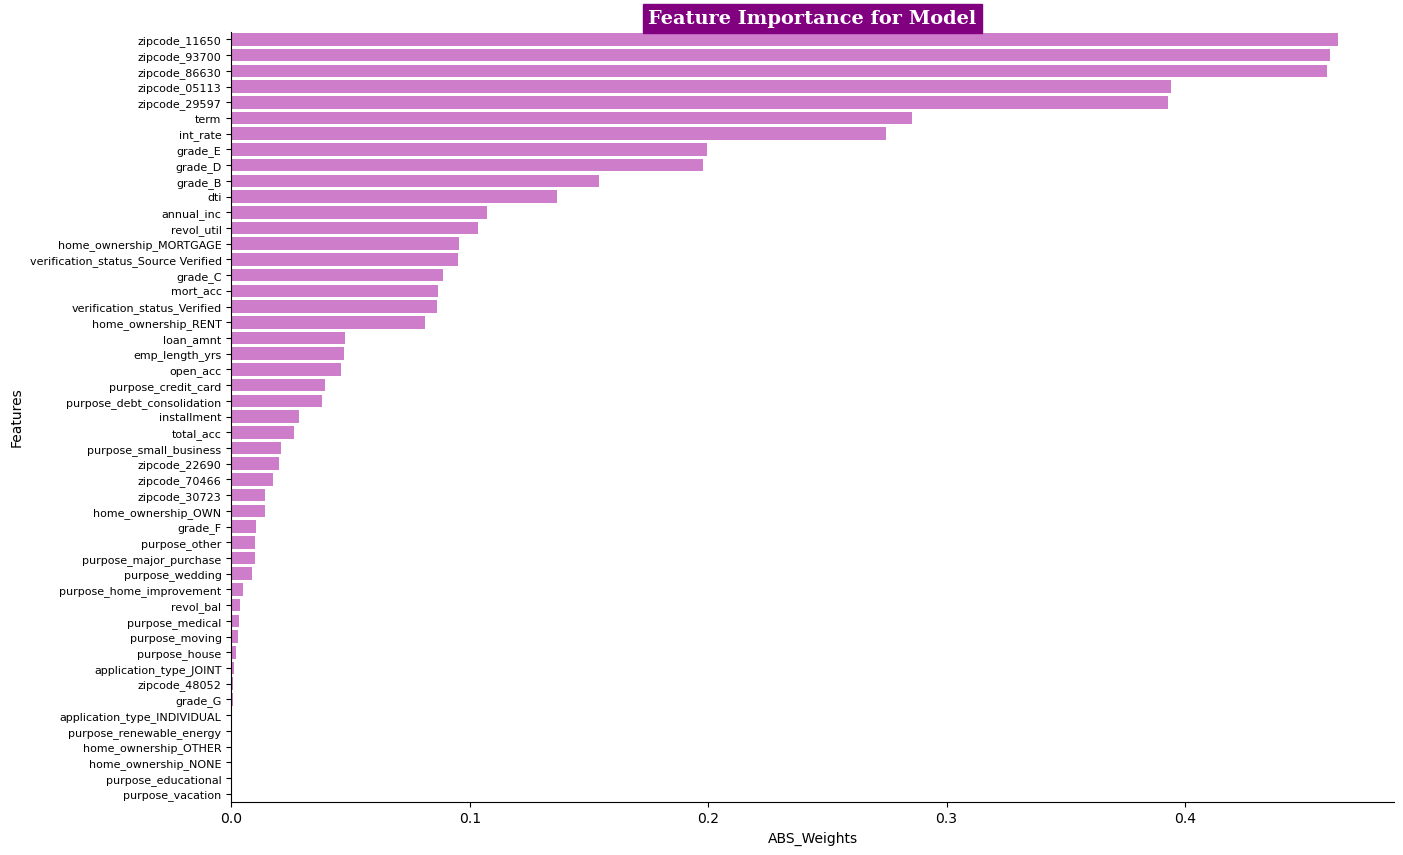

In [249]:
plt.figure(figsize=(15,10))
sns.barplot(y=coeff_df['Features'],x=coeff_df['ABS_Weights'],color='orchid')
plt.title("Feature Importance for Model",fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='purple',color='w')
plt.xlabel("ABS_Weights")
plt.yticks(fontsize=8)
plt.ylabel("Features")
sns.despine()
plt.show()

Observations:

- The model has assigned significant weight to the zip_code, Annual Income, grade features, indicating that certain zip codes strongly influence the prediction of defaulters.
- Features such as dti (debt-to-income ratio), open_acc (number of open accounts), and loan_amnt (loan amount) also have high positive coefficients, highlighting their importance in predicting default risk.
- Several zip codes have large negative coefficients, suggesting that they are asssociated with lower likelihood of default.

## ROC AUC

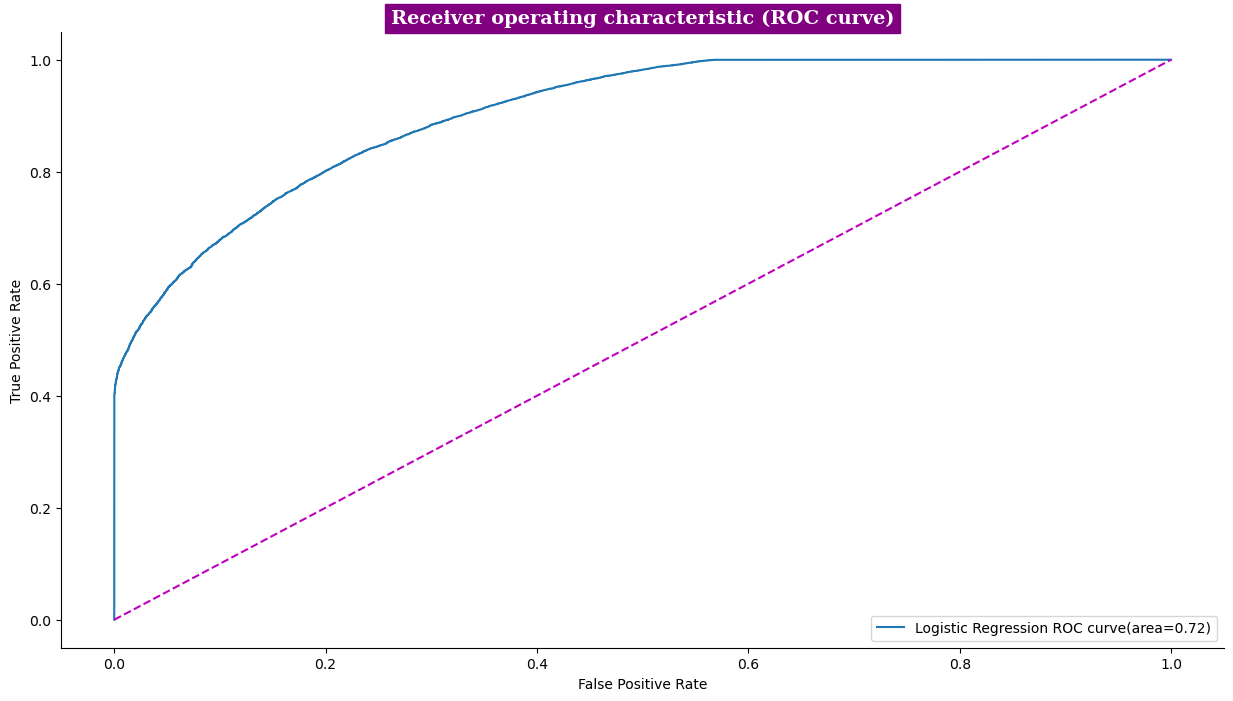

In [254]:
#Area under ROC Curve
logit_roc_auc= roc_auc_score(y_test,y_reg_pred)

#Compute the false positive rate, true positive rate and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_reg_pred_proba[:,1])

#Compute the area under the ROC curve
roc_auc=auc(fpr,tpr)

#Plot ROC Curve
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label='Logistic Regression ROC curve(area=%0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'m--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC curve)',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='purple',color='w')
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [257]:
logit_roc_auc

0.7221335554512818

In [261]:
roc_auc=auc(fpr,tpr)
roc_auc

0.903710604561599

💡Insights:

- Trade-off in Performance: The ROC curve area, representing model performance, is 72%. This indicates that the model effectively distinguishes between classes 72% of the time.
- Ideally, we aim for a higher True Positive Rate (TPR) and a lower False Positive Rate (FPR) to ensure accurate predictions.
- The ROC curve illustrates that as True Positives increase, there's a simultaneous increase in False Positives.
- Misclassification: This trade-off implies that while identifying more Fully Paid customers, there's a heightened risk of misclassifying Charged Off customers as Fully Paid, potentially leading to Non-Performing Assets
(NPAs).


These points emphasize the need to mitigate this risk:


- Reducing FPR while maintaining TPR is crucial to minimize misclassifications and associated risks.
- By shifting False Positives towards the left on the ROC curve, the model's overall performance, as measured by AUC, can improve.
- This improvement in AUC relies on maintaining a high True Positive Rate while reducing False Positives.

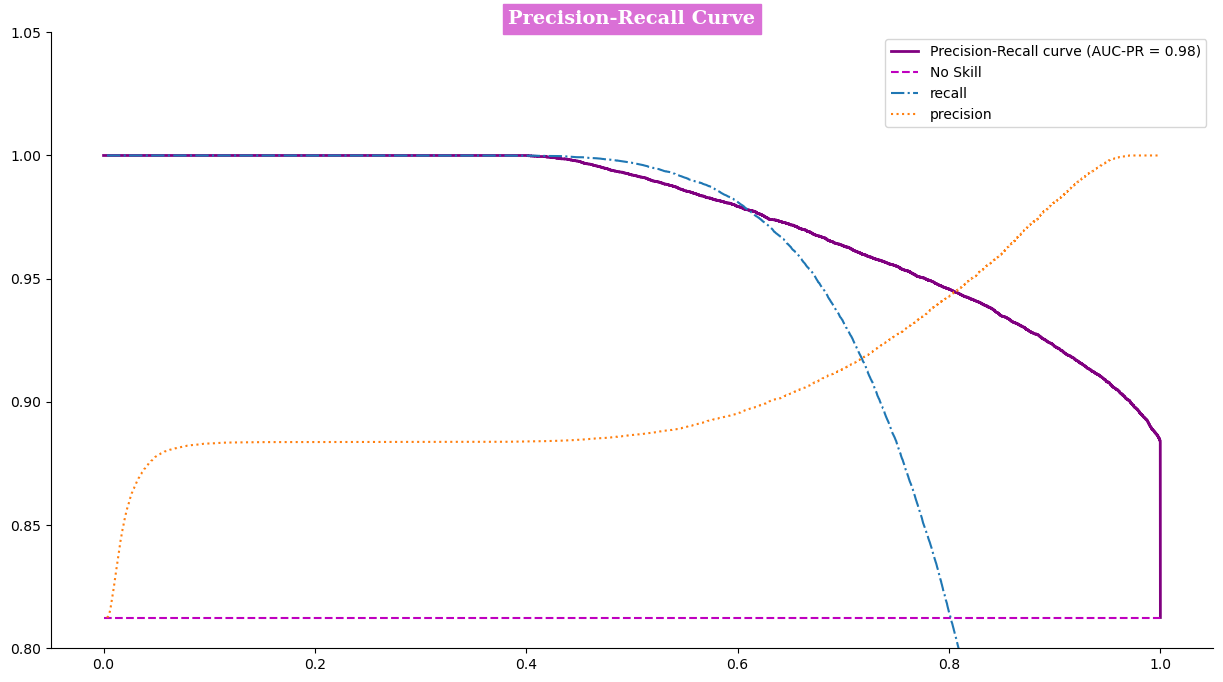

In [265]:
precision,recall,thresholds= precision_recall_curve(y_test,y_reg_pred_proba[:,1])

average_precision= average_precision_score(y_test,y_reg_pred_proba[:,1])

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(15,8))
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AUC-PR = {average_precision:.2f})')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color='m')
plt.plot(thresholds, recall[0:thresholds.shape[0]], label='recall',linestyle='-.')
plt.plot(thresholds, precision[0:thresholds.shape[0]], label='precision',linestyle='dotted')
# plt.xlim([0.0, 1.0])
plt.ylim([0.8, 1.05])
plt.title('Precision-Recall Curve',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='orchid',color='w')
plt.legend(loc='upper right')
sns.despine()
plt.show()

In [267]:
auc(recall,precision).round(3)

0.975

Observations:

- The Area Under the Curve(AUC) for the precision-recall curve is 0.975. This hgih AUC value suggests that the model achieves excellent performance in distinguishing between positive and negative classes, showcasing strong precison-recall characteristics.
- Precision-Recall Curve Superiority: Precision-recall curves are pivotal, especially in imbalanced datasets, focusing on accurate predictions of the relevant class(Class-1 Fully paid in this case)
- Irrelevance of True Negative: Precision and recall computations disregard true negatives, simplyfying focus to the correct prediction of Fully Paid customers.
- AUC Strengthens Model Evaluation : A high AUC(97.5%) underscores the model's robustness in distinguishing between classes, indicating it's efficacy.
- Precision Enhancement Priority: Optimal model refinement centers on elevating precision by minimizing False Positives, vital for improving overall performance and mitigating risks.

In [270]:
#Balanced Model
lr=LogisticRegression(max_iter=1000,class_weight='balanced')

lr_model= lr.fit(X_train,y_train)
print(classification_report(y_test,lr_model.predict(X_test)))

cm_bal=confusion_matrix(y_test, lr_model.predict(X_test))
cm_bal_df=pd.DataFrame(cm_bal, index=['Defaulter','Fully Paid'],columns=['Defaulter','Fully Paid'])
cm_bal_df

              precision    recall  f1-score   support

           0       0.47      0.81      0.60     11678
           1       0.95      0.79      0.86     50601

    accuracy                           0.79     62279
   macro avg       0.71      0.80      0.73     62279
weighted avg       0.86      0.79      0.81     62279



,Defaulter,Fully Paid
Defaulter,9466,2212
Fully Paid,10576,40025


# Observations from classification report:

- Precision:95%
- Recall- 79%
- F1-score:86%
- Accuracy-79%

In [274]:
lr_model.intercept_

array([7.52662019])

# Q6: Thinking from a bank's perspective, which metric should our primary focus be on.

a. ROC AUC

b. Precision

c. Recall

d. F1 Score


- From a bank's perspective, minimizing risks and maximizing profitability are paramount. ROC AUC (Receiver Operating Characteristic Area Under Curve) is indeed a crucial metric because it
encompasses both True Positive Rate (TPR) and False Positive Rate (FPR)
- Bank's primary focus should be on ROC AUC , because bank needs to reduce FPR (False Positive Rate) and needs to increase the TPR (True Positive Rate).
- Maximizing TPR ensures that the bank correctly identifies customers who fully pay their loans (reducing False Negatives), while minimizing FPR ensures that the bank doesn't wrongly classify customers as fully paid
when they're actually charged off (reducing False Positives).
- By optimizing ROC AUC, the bank can strike a balance between correctly identifying creditworthy customers and minimizing the risk of defaulters, thereby enhancing the overall performance and reliability of its credit
scoring model.

## Another approach:

- Since I'm having High Recall value of 100% in Regularized model most efficient model:

- From a bank's perspective, the primary focus should be on minimizing risks while maximizing profitability. Therefore, the most relevant metric would be Precision.

- Precision represents the proportion of correctly predicted positive instances (e.g., customers who fully pay their loans) out of all instances predicted as positive. In the context of a bank, precision reflects the accuracy of identifying creditworthy customers who are likely to repay their loans. Maximizing precision ensures that the bank minimizes the number of false positives, which are instances where the bank incorrectly identifies
customers as creditworthy when they are not. By prioritizing precision, the bank can reduce the risk of loan defaults and associated financial losses.

- While ROC AUC, Recall, and F1 Score are also important metrics, precision aligns closely with the bank's objective of minimizing risks and ensuring the quality of its loan portfolio.

# Q7.How does the gap in precision and recall affect the bank?

- To comprehend the errors made by a model, it's crucial to evaluate both false positives and false negatives, which are gauged through metrics like recall and precision. When recall is low, it poses a significant risk for the bank.
- So the gap betweeen precision recall will affect the bank. As the gap widens, there will be increase in incorrect predictions.
- Good precision means less False Positives i.e less NPA loan accounts.
- Good recall means lesss False Negatives i.e not loosing on good customers.

## Q8. Which were the features that heavily affected the outcome ?

- Address(Zipcode), Annual_income, Grade seems to be most important feature in our case. 
- Loan duration term, Total Credit balance revol_bal : Monthly debt vs monthly income ratio dti , Interest int_rate also high weights (coeffecients) in the model.

# Q9. Will the results be affected by geographial location ? (Yes/no)

- Yes we can see that zip_code(address) is a very important feature so geographical location has impact on our result. 

💰⚡Business Recommendations for LoanTap⚡💰📣
Optimize Loan Approval Strategy:
- Focus on maximizing the F1 score and area under the Precision-Recall Curve to effectively manage the precision-recall trade-off. This ensures identifying most defaulters while reducing false positives, enhancing risk management.

Model Improvement:
- Consider using more complex classifiers like Random Forests or XGBoost and perform hyperparameter tuning to enhance model performance and capture intricate relationships in the data.

Cross-Validation:
- Employed stratified k-fold cross-validation to ensure representative distribution of minority class in each fold, providing reliable estimates of model performance.

Policy Adjustments Based on Insights:
- Scrutinize loans with lower grades more rigorously and consider adjusting interest rates to compensate for higher risk.
- Implement targeted strategies for high-risk zip codes, such as additional verification steps or higher interest rates.
- Evaluate small business loans with additional financial health checks and collateral requirements to mitigate default risk.
By implementing these recommendations, LoanTap can enhance their loan approval process, minimize the risk of NPAs, and ensure sustainable growth and financial stability.